# National Charitable Organisation Project

<a id='Table_of_Content'><a/>

[1. Import Libraries](#Import_Libraries)\
[2. Import Data](#Import_Data)\
[3. Data Description & Exploration](#Data_Description)

- Data Shape
- Columns & dtype
- Peek at the Data
- Missing Values %
- Statistics
- Correlations (numeric variables)
- Data Distributions (Histograms)
    
[4. Data Preparation](#Data_Preparation)

- Dropped Columns
- Handle Missing Values
- Prepare Data for Scaling
- Scaling: StandardScaler()
- Scaling: RobustScaler()
    
[5. About Algorithms](#About_Algorithms)
    
-  Set-up the test harness to use 10-fold cross validation
-  Build Models:
    - Logistic Regression (LR)
    - Linear Discriminant Analysis (LDA)
    - K-Nearest Neighbors (KNN)
    - Classification and Regression Trees (CART)
    - Random Forest Decision Tree (RFTree)
    - Gradient Boosting (GrB)
    - Gaussian Naive Bayes (NB)
    - Support Vector Machines (SVM)
    - Deep Learning (Deep)
     
[6. Evaluate Some Algorithms](#Evaluate_Some_Algorithms)

- 6.1.a Create a Validation Dataset with Standard Scaled Data
- 6.2.a Build Models, Make and Evaluate Predictions on different models with Standard Scaled Data
- 6.1.b Create a Validation Dataset with Robust Scaled Data
- 6.2.b Build Models, Make and Evaluate Predictions on different models with Robust Scaled Data
- 6.3 Choose the best model

[7. Train the Final Machine Learning Model](#Train_the_Final_Machine_Learning_Model)\
[8. Save the Load Final Machine Learning Model](#Save_the_Final_Machine_Learning_Model)\
[9. Data Preparation of New Data](#Data_Preparation_New_Data)\
[10. Make Predictions](#Making_Predictions)

<a id='Import_Libraries'><a/>

# 1. Import Libraries

##### Versions of the Libraries

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# seaborn
import seaborn
print('seaborn: {}'.format(seaborn.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# joblib
import joblib
print('joblib: {}'.format(joblib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy: 1.18.1
pandas: 1.0.1
scipy: 1.4.1
matplotlib: 3.1.3
seaborn: 0.10.0
sklearn: 0.22.1
joblib: 0.14.1


- Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
- numpy: 1.18.1
- pandas: 1.0.1
- scipy: 1.4.1
- matplotlib: 3.1.3
- seaborn: 0.10.0
- sklearn: 0.22.1
- joblib: 0.14.1

##### Import Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None) # Set it to None to display all columns in the dataframe
pd.set_option('display.width', None) # Width of the display in characters. If set to None and pandas will correctly auto-detect the width
pd.set_option('display.max_colwidth', None) # The maximum width in characters of a column in the repr of a pandas data structure
pd.options.mode.chained_assignment = None # switch off pandas warning
from scipy import stats  # library of statistical functions
import matplotlib.pyplot as plt
%matplotlib inline  
#plt.rcParams['figure.figsize'] = (14,12) # to change the charts size
import seaborn as sns      # for drawing attractive and informative statistical graphics
import time
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib

**Correlations conditional formatting**

In [3]:
def correlations_conditional_formatting(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.9:
    color = 'red'
  elif value > 0.9:
    color = 'green'
  else:
    color = 'gainsboro'

  return 'color: %s' % color

<a id='Import_Data'><a/>

[**Table of Content**](#Table_of_Content)

# 2. Import Data

In [3]:
donor_data = pd.read_csv('Donor Raw Data_ML with Python.csv')             # Historical Data
prospective_data=pd.read_csv('Prospective Donor_ML with Python.csv')      # New Contact List

<a id='Data_Description'><a/>

[**Table of Content**](#Table_of_Content)

# 3. Data Description & Exploration

##### Data shape

In [5]:
print('Donor Shape (Historical Data) : ',donor_data.shape)                  # Historical Data
print('Prospective Shape (New Contact List) : ',prospective_data.shape)     # New Contact List

Donor Shape (Historical Data) :  (19372, 50)
Prospective Shape (New Contact List) :  (2148, 48)


##### Donor Columns and Data Types

In [6]:
print()
print('|Column Name Donors            |Type    |','\n')
donor_data.dtypes


|Column Name Donors            |Type    | 



TARGET_B                         int64
TARGET_D                       float64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                  object
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS       

##### Prospective Columns and Data Types

In [7]:
print()
print('|Column Name Prospective       |Type    |','\n')
prospective_data.dtypes


|Column Name Prospective       |Type    | 



CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                  object
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
RECENCY_STATUS_96NK             object
FREQUENCY_STATUS_97NK    

##### Peek at the Data

In [8]:
print('\n','Donor Raw Data_ML with Python.csv       HEAD')
donor_data.head()


 Donor Raw Data_ML with Python.csv       HEAD


,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,M,2.0,0,P,0,NaN,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [9]:
print('\n','Donor Raw Data_ML with Python.csv       TAIL')
donor_data.tail()


 Donor Raw Data_ML with Python.csv       TAIL


,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
19367,0,NaN,191687,89,66.0,1,U,1,03,H,F,4.0,1,B,241,7.0,1224,411,53,17457,1,24,34,41,0,0,A,2,0.154,15.0,0.167,15.0,2,1,18.0,18,50,103.0,6,17.17,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,NaN,191710,137,77.0,1,C,1,24,H,F,5.0,1,B,240,7.0,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,NaN,191746,29,NaN,1,S,1,11,U,M,1.0,1,P,0,NaN,383,203,74,11971,0,41,20,58,0,0,N,1,0.000,0.0,0.000,0.0,0,0,NaN,5,14,15.0,1,15.00,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,NaN,191775,129,78.0,1,?,?,.,U,M,6.0,1,B,0,9.0,1861,421,84,22294,0,0,0,0,1,14,A,1,0.053,25.0,0.000,0.0,1,0,23.0,31,99,440.0,24,18.33,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11
19371,1,150.0,191779,29,70.0,0,?,?,.,U,M,5.0,1,B,2,NaN,1432,636,98,35544,0,62,13,61,0,0,N,1,0.100,25.0,0.250,25.0,1,1,24.0,7,18,25.0,1,25.00,0.0,25.0,25.0,25.0,4,9,24,24,25.00,1


In [10]:
print('\n','Prospective Raw Data_ML with Python.csv       HEAD')
prospective_data.head()


 Prospective Raw Data_ML with Python.csv       HEAD


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,0,N,0,NaN,655,219,77,12671,0,46,24,53,0,0,A,1,0.071,21.00,0.000,0.00,1,0,26.0,11,25,103.0,7,14.71,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,1,N,0,1.0,475,227,70,10221,0,30,33,29,1,1,S,2,0.350,10.00,0.500,10.00,7,5,22.0,44,110,186.0,31,6.00,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,1,B,11,NaN,1117,544,87,18212,1,27,70,21,0,0,F,1,0.077,20.00,0.200,20.00,1,1,20.0,13,39,76.0,9,8.44,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,1,B,1,7.0,2257,485,84,17885,0,43,28,41,1,10,A,1,0.333,8.83,0.444,8.75,6,4,19.0,42,114,247.0,38,6.50,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,0,B,0,NaN,789,413,97,14123,0,31,16,7,0,0,A,3,0.278,5.40,0.222,6.00,5,2,20.0,15,43,70.0,12,5.83,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


Donor Raw Data_ML with Python **(Historical Data)** and Prospective Donor_ML with Python **(New Contact List)** have practically the same structure. 

In Prospective Donor_ML with Python **(New Contact List)** are missing two columns:

   - TARGET_B: which it will be created and named "Prediction" and populated with the model predictions
   - TARGET_D: which it will be dropped also in the historical data

##### Missing Values

In [11]:
# missing value counts in each of these columns
miss = donor_data.isnull().sum()/len(donor_data)
miss = miss[miss > 0]
miss.sort_values(ascending=False,inplace=True)
# miss
# convert 'miss' from Series to DataFrame
miss_DF= miss.to_frame()
miss_DF

,0
TARGET_D,0.750000
WEALTH_RATING,0.454780
DONOR_AGE,0.247522
INCOME_GROUP,0.226719
MONTHS_SINCE_LAST_PROM_RESP,0.012699


In [12]:
#count of missing values
print('|Column Name Donor            |Type    |','\n')
donor_data.isna().sum()

|Column Name Donor            |Type    | 



TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [13]:
print('|Column Name Prospective      |Type    |','\n')
prospective_data.isna().sum()

|Column Name Prospective      |Type    | 



CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

##### Statistics

In [3]:
# statistics

donor_statistics = donor_data.describe()

In [4]:
donor_statistics

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.00000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,1079.871929,341.970215,69.698999,15857.334452,1.029011,30.573921,29.603293,32.852467,0.504439,0.931138,1.983998,0.190127,15.365396,0.230808,11.68547,3.043103,1.730539,19.038900,18.668078,47.570514,104.425716,9.979765,12.858338,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,960.753448,164.207807,21.711019,8710.630390,4.918297,11.421471,15.120360,17.839765,0.499993,2.545585,1.099346,0.113947,10.167485,0.186230,10.83412,2.046401,1.535521,3.415559,8.558778,22.950158,105.722460,8.688163,8.787758,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-12.000000,2.000000,5.000000,15.000000,1.000000,1.360000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,518.000000,232.000000,60.000000,10869.000000,0.000000,25.000000,20.000000,21.000000,0.000000,0.000000,1.000000,0.105000,10.000000,0.100000,5.00000,2.000000,1.000000,17.000000,11.000000,28.000000,42.000000,4.000000,8.000000,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,747.000000,311.000000,76.000000,13816.500000,0.000000,31.000000,29.000000,32.000000,1.000000,0.000000,2.000000,0.167000,14.000000,0.200000,10.14000,3.000000,1.000000,18.000000,18.000000,47.000000,79.000000,8.000000,11.200000,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,1227.000000,417.000000,85.000000,18308.250000,0.000000,37.000000,39.000000,43.000000,1.000000,1.000000,3.000000,0.250000,20.000000,0.333000,16.00000,4.000000,2.000000,21.000000,26.000000,64.000000,132.000000,14.000000,15.000000,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,6000.000000,1500.000000,99.000000,174523.000000,97.000000

In [9]:
donor_statistics.to_csv('donor_statistics.csv')

In [5]:
donor_statistics_transposed = donor_statistics.transpose()

In [6]:
donor_statistics_transposed

,count,mean,std,min,25%,50%,75%,max
TARGET_B,19372.0,0.250000,0.433024,0.00,0.000,0.000,0.250,1.0
TARGET_D,4843.0,15.624344,12.445137,1.00,10.000,13.000,20.000,200.0
CONTROL_NUMBER,19372.0,96546.225377,55830.643871,5.00,48289.000,96937.000,145429.500,191779.0
MONTHS_SINCE_ORIGIN,19372.0,73.409973,41.255574,5.00,29.000,65.000,113.000,137.0
DONOR_AGE,14577.0,58.919051,16.669382,0.00,47.000,60.000,73.000,87.0
IN_HOUSE,19372.0,0.073198,0.260469,0.00,0.000,0.000,0.000,1.0
INCOME_GROUP,14980.0,3.907543,1.864796,1.00,2.000,4.000,5.000,7.0
PUBLISHED_PHONE,19372.0,0.497729,0.500008,0.00,0.000,0.000,1.000,1.0
MOR_HIT_RATE,19372.0,3.361656,9.503481,0.00,0.000,0.000,3.000,241.0
WEALTH_RATING,10562.0,5.005397,2.815386,0.00,3.000,5.000,7.000,9.0


In [7]:
donor_statistics_transposed.to_csv('donor_statistics_transposed.csv')

In [4]:
#skewness
print ("The skewness of TARGET_B is {:.2f}".format(donor_data['TARGET_B'].skew()))

The skewness of TARGET_B is 1.15


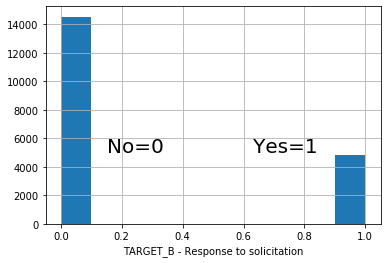

In [20]:
donor_data['TARGET_B'].hist()
plt.xlabel('TARGET_B - Response to solicitation')
plt.text(0.15, 5000, 'No=0              Yes=1',dict(size=20))
plt.show()

##### separate variables into numeric and categorical data

In [18]:
#numeric data
numeric_data = donor_data.select_dtypes(include=[np.number])

#categorical data
cat_data = donor_data.select_dtypes(exclude=[np.number])

print ("There are {} numeric and {} categorical columns in donor data (historical data).".
       format(numeric_data.shape[1],cat_data.shape[1]))

There are 43 numeric and 7 categorical columns in donor data (historical data).


##### correlations before Data Preparation

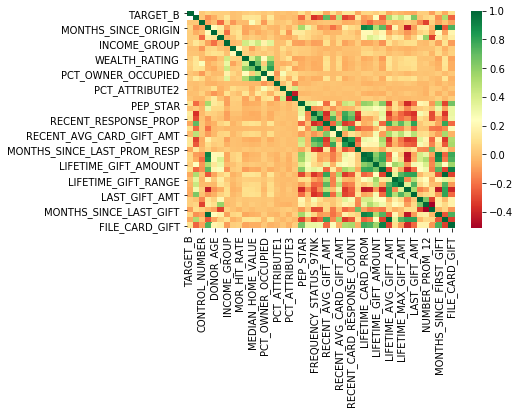

In [19]:
#correlation plot
corr_before_Data_Preparation = numeric_data.corr()
sns.heatmap(corr_before_Data_Preparation, cmap='RdYlGn')

In [20]:
corr_before_Data_Preparation.style.applymap(correlations_conditional_formatting)

In [21]:
corr_before_Data_Preparation[(corr_before_Data_Preparation < -0.9) | (corr_before_Data_Preparation > 0.9)].style.applymap(correlations_conditional_formatting)

In [22]:
corr_before_Data_Preparation.to_csv('corr_before_Data_Preparation.csv')

In [23]:
print (corr_before_Data_Preparation['TARGET_B'].sort_values(ascending=False))

TARGET_B                       1.000000
FREQUENCY_STATUS_97NK          0.137343
RECENT_RESPONSE_COUNT          0.128762
RECENT_CARD_RESPONSE_COUNT     0.126241
RECENT_RESPONSE_PROP           0.118343
FILE_CARD_GIFT                 0.105552
PEP_STAR                       0.105389
RECENT_CARD_RESPONSE_PROP      0.100902
LIFETIME_GIFT_COUNT            0.100018
LIFETIME_PROM                  0.067846
MONTHS_SINCE_FIRST_GIFT        0.066514
LIFETIME_CARD_PROM             0.065585
MONTHS_SINCE_ORIGIN            0.062795
MEDIAN_HOME_VALUE              0.050377
PER_CAPITA_INCOME              0.041528
LIFETIME_GIFT_AMOUNT           0.041378
IN_HOUSE                       0.040964
NUMBER_PROM_12                 0.039967
INCOME_GROUP                   0.039932
CARD_PROM_12                   0.038947
MEDIAN_HOUSEHOLD_INCOME        0.038190
DONOR_AGE                      0.036949
WEALTH_RATING                  0.034742
CONTROL_NUMBER                 0.024607
PCT_OWNER_OCCUPIED             0.015720


##### Data Distributions (Histograms)

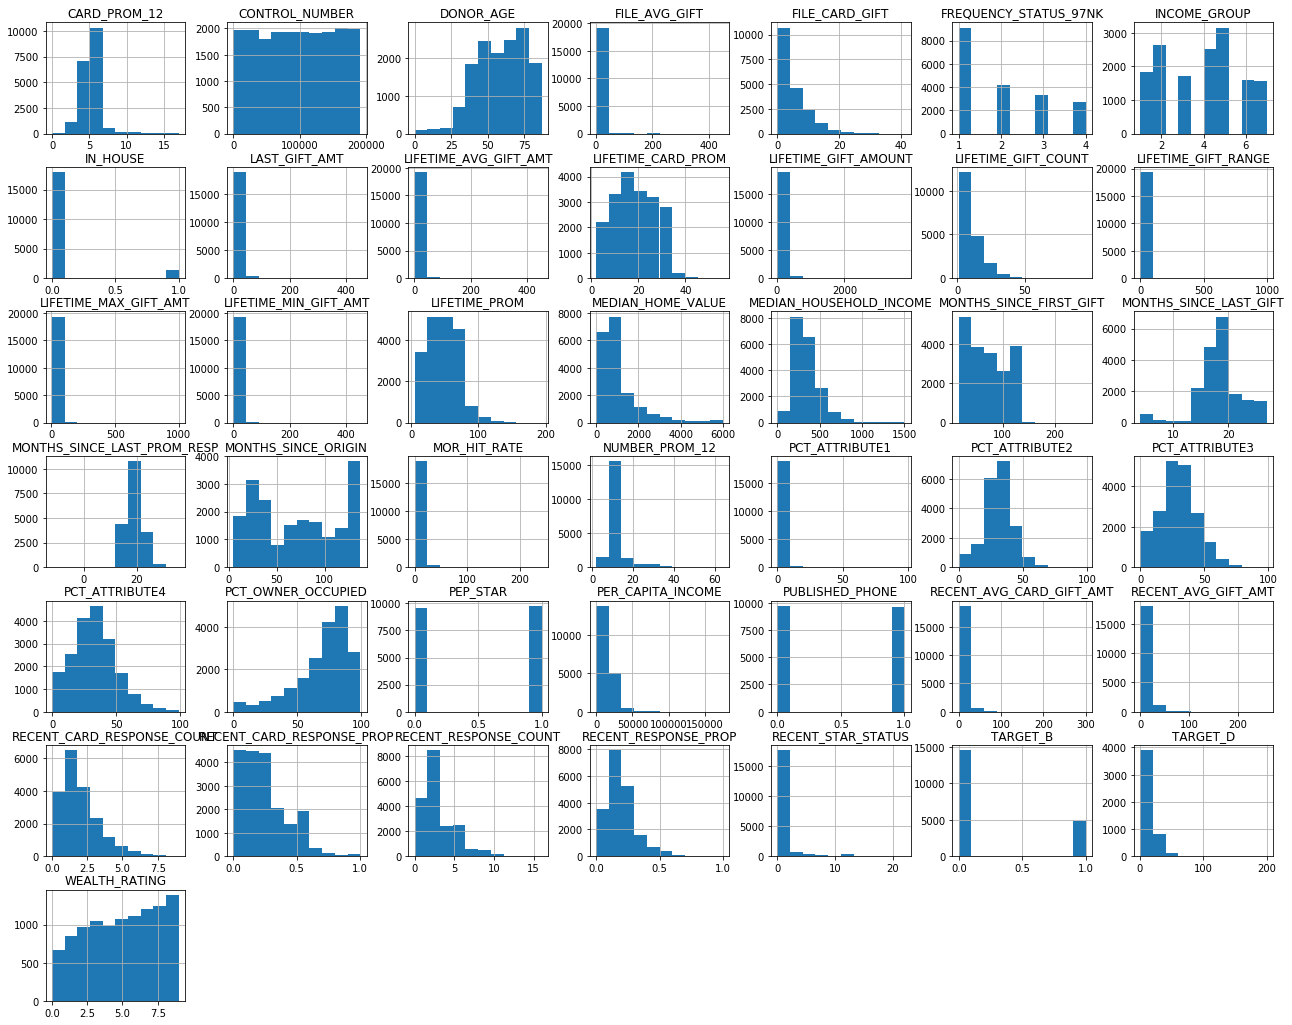

In [24]:
donor_data.hist(figsize=(22,18))
plt.show()

<a id='Data_Preparation'><a/>

[**Table of Content**](#Table_of_Content)

# 4. Data Preparation

##### Dropped Columns: 

|  Column Name  |  Reason  |
|-----|-----|
| TARGET_D | missing values 75% |
| CONTROL_NUMBER | unique values |
| HOME_OWNER | missing values 45% |
| INCOME_GROUP | missing values 23% |
| OVERLAY_SOURCE | missing values 23% |
| WEALTH_RATING | missing values 45% |

In [21]:
# A new donor_dataset with dropped: 'TARGET_D', 'CONTROL_NUMBER' , 'HOME_OWNER' , 'INCOME_GROUP', OVERLAY_SOURCE
#                                    , 'WEALTH_RATING'

column_list = ['TARGET_B', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'DONOR_GENDER', 'PUBLISHED_PHONE',
       'MOR_HIT_RATE', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT']
donor_dataset = donor_data[column_list]

In [22]:
print(donor_dataset.shape)

(19372, 44)


### [ DONOR_AGE ]
**Handle missing values**

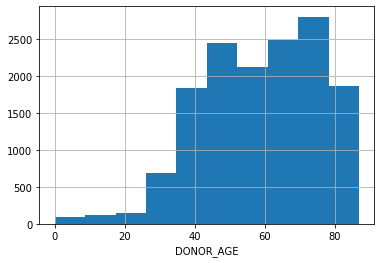

In [23]:
donor_dataset['DONOR_AGE'].hist()
plt.xlabel('DONOR_AGE')
plt.show()

In [24]:
# deal with age missing values

# calculate the mean and the median for the whole population

median_DONOR_AGE = donor_dataset['DONOR_AGE'].median()
print('Median = ',median_DONOR_AGE)
mean_DONOR_AGE = donor_dataset['DONOR_AGE'].mean()
print('Mean = ',mean_DONOR_AGE)

Median =  60.0
Mean =  58.91905055909995


Because the **distribution is not normal**, NaN values will be replaced with the **median**.

In [25]:
donor_dataset['DONOR_AGE'].fillna(median_DONOR_AGE, inplace = True)

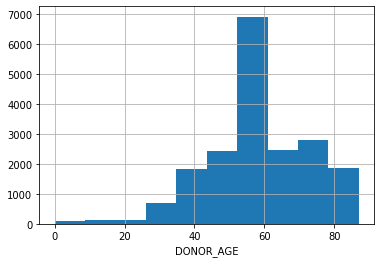

In [26]:
donor_dataset['DONOR_AGE'].hist()
plt.xlabel('DONOR_AGE')
plt.show()

### [ MONTHS_SINCE_LAST_PROM_RESP ]

**Handle missing values**

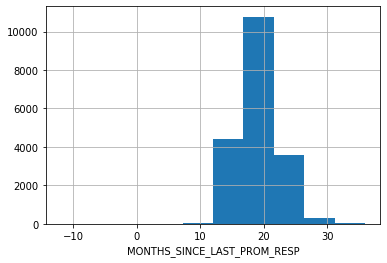

In [27]:
donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].hist()
plt.xlabel('MONTHS_SINCE_LAST_PROM_RESP')
plt.show()

In [28]:
median_MONTHS_SINCE_LAST_PROM_RESP = donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].median()
print('Median = ',median_MONTHS_SINCE_LAST_PROM_RESP)
mean_MONTHS_SINCE_LAST_PROM_RESP = donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].mean()
print('Mean = ',mean_MONTHS_SINCE_LAST_PROM_RESP)

Median =  18.0
Mean =  19.038899926801214


Because the distribution is quite **normal**, NaN values will be replaced with the **mean**.

In [29]:
# replace NaN with the mean

donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].fillna(mean_MONTHS_SINCE_LAST_PROM_RESP, inplace = True)

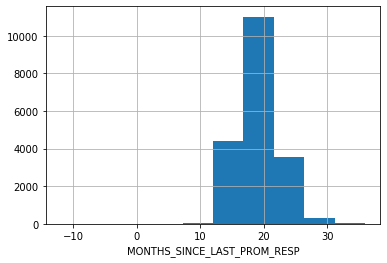

In [30]:
donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].hist()
plt.xlabel('MONTHS_SINCE_LAST_PROM_RESP')
plt.show()

### [ SES ]
**Str values '1','2','3','4' replaced with numbers and '?' with number 5**.

In [31]:
donor_dataset['SES'].replace('1',1,inplace=True)
donor_dataset['SES'].replace('2',2,inplace=True)
donor_dataset['SES'].replace('3',3,inplace=True)
donor_dataset['SES'].replace('4',4,inplace=True)
donor_dataset['SES'].replace('?',5,inplace=True)

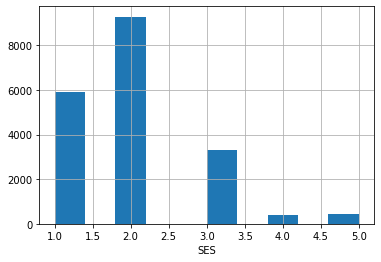

int64


,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,101,87.0,0,?,5,.,M,0,0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,137,79.0,0,R,2,45,M,0,0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,113,75.0,0,S,1,11,F,0,0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,92,60.0,0,U,2,04,F,1,0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,101,74.0,0,R,2,49,F,1,8,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [32]:
donor_dataset['SES'].hist()
plt.xlabel('SES')
plt.show()
print(donor_dataset['SES'].dtype)
donor_dataset.head(5)

### [ CLUSTER_CODE ]

**Replaced ' .' with the number '54' and after str values with numbers.**

In [33]:
donor_dataset['CLUSTER_CODE'].replace(' .','54',inplace=True)

In [34]:
donor_dataset['CLUSTER_CODE'] = donor_dataset['CLUSTER_CODE'].astype(int)

int32


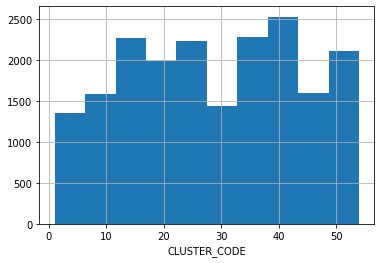

In [35]:
print(donor_dataset['CLUSTER_CODE'].dtype)
donor_dataset['CLUSTER_CODE'].hist()
plt.xlabel('CLUSTER_CODE')
plt.show()

### [ DONOR_GENDER ]

**Dropped rows with gender inputted wrongly.**

In [36]:
donor_dataset.shape

(19372, 44)

In [37]:
donor_dataset['DONOR_GENDER'].unique()

array(['M', 'F', 'U', 'A'], dtype=object)

In [38]:
# Get names of indexes for which column ['DONOR_GENDER'] has value 'U' and 'A'
indexNames_donor_U = donor_dataset[donor_dataset['DONOR_GENDER'] == 'U'].index    # U 1017 values
indexNames_donor_A = donor_dataset[donor_dataset['DONOR_GENDER'] == 'A'].index    # A 1 value

# Delete these row indexes from dataFrame
donor_dataset.drop(indexNames_donor_U, inplace=True)
donor_dataset.drop(indexNames_donor_A, inplace=True)

In [39]:
donor_dataset.shape

(18354, 44)

In [40]:
19372-18354

1018

In [41]:
donor_dataset.to_csv('donor_prepared_for_analysis.csv',index=None)

**Replaced gender values with 1 for female, 0 for male with a categorical endoding.**

In [45]:
donor_dataset['DONOR_GENDER'] = np.where(donor_dataset['DONOR_GENDER']=='F',1,0) # categorical encoding

(18354, 44)


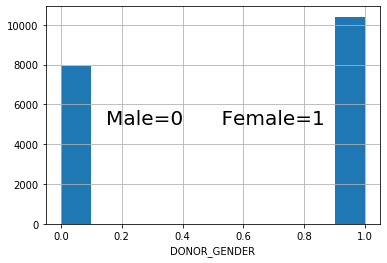

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,101,87.0,0,?,5,54,0,0,0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,137,79.0,0,R,2,45,0,0,0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,113,75.0,0,S,1,11,1,0,0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,92,60.0,0,U,2,4,1,1,0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,101,74.0,0,R,2,49,1,1,8,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [46]:
print(donor_dataset.shape)
donor_dataset['DONOR_GENDER'].hist()
plt.xlabel('DONOR_GENDER')
plt.text(0.15, 5000, 'Male=0      Female=1',dict(size=20))
plt.show()
donor_dataset.head()

### [ URBANICITY ]

Replaced:
- ? -> 1
- R -> 2
- S -> 3
- U -> 4
- T -> 5
- C -> 6

In [47]:
donor_dataset['URBANICITY'].replace('C',6,inplace=True)  # C = City
donor_dataset['URBANICITY'].replace('T',5,inplace=True)  # T = Town
donor_dataset['URBANICITY'].replace('U',4,inplace=True)  # U = Urban
donor_dataset['URBANICITY'].replace('S',3,inplace=True)  # S = Suburban
donor_dataset['URBANICITY'].replace('R',2,inplace=True)  # R = Rural
donor_dataset['URBANICITY'].replace('?',1,inplace=True)  # ? = Unknown
donor_dataset.head()

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,101,87.0,0,1,5,54,0,0,0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,137,79.0,0,2,2,45,0,0,0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,113,75.0,0,3,1,11,1,0,0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,92,60.0,0,4,2,4,1,1,0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,101,74.0,0,2,2,49,1,1,8,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


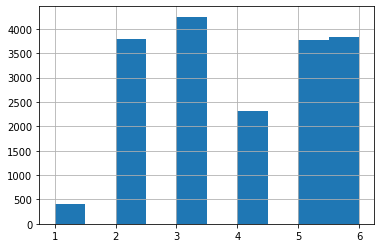

In [48]:
donor_dataset['URBANICITY'].hist()
plt.show()

### RECENCY_STATUS_96NK

Replaced:
- A -> 1
- E -> 2
- F -> 3
- L -> 4
- N -> 5
- S -> 6

In [49]:
donor_dataset['RECENCY_STATUS_96NK'].replace('A',1,inplace=True)
donor_dataset['RECENCY_STATUS_96NK'].replace('E',2,inplace=True)
donor_dataset['RECENCY_STATUS_96NK'].replace('F',3,inplace=True)
donor_dataset['RECENCY_STATUS_96NK'].replace('L',4,inplace=True)
donor_dataset['RECENCY_STATUS_96NK'].replace('N',5,inplace=True)
donor_dataset['RECENCY_STATUS_96NK'].replace('S',6,inplace=True)
donor_dataset.head()

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,101,87.0,0,1,5,54,0,0,0,554,294,76,11855,0,0,0,0,1,0,1,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,137,79.0,0,2,2,45,0,0,0,334,212,72,10385,0,41,21,31,1,1,6,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,113,75.0,0,3,1,11,1,0,0,2388,405,63,30855,0,25,26,57,1,1,6,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,92,60.0,0,4,2,4,1,1,0,1688,153,3,16342,0,25,32,42,1,0,1,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,101,74.0,0,2,2,49,1,1,8,514,328,90,12107,0,33,36,37,0,0,1,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


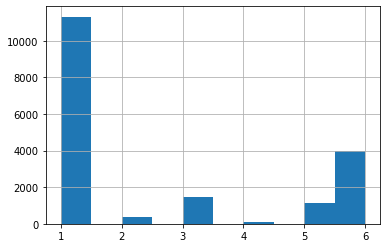

In [50]:
donor_dataset['RECENCY_STATUS_96NK'].hist()
plt.show()

##### Data Distributions (Histograms) - Before Data Preparation

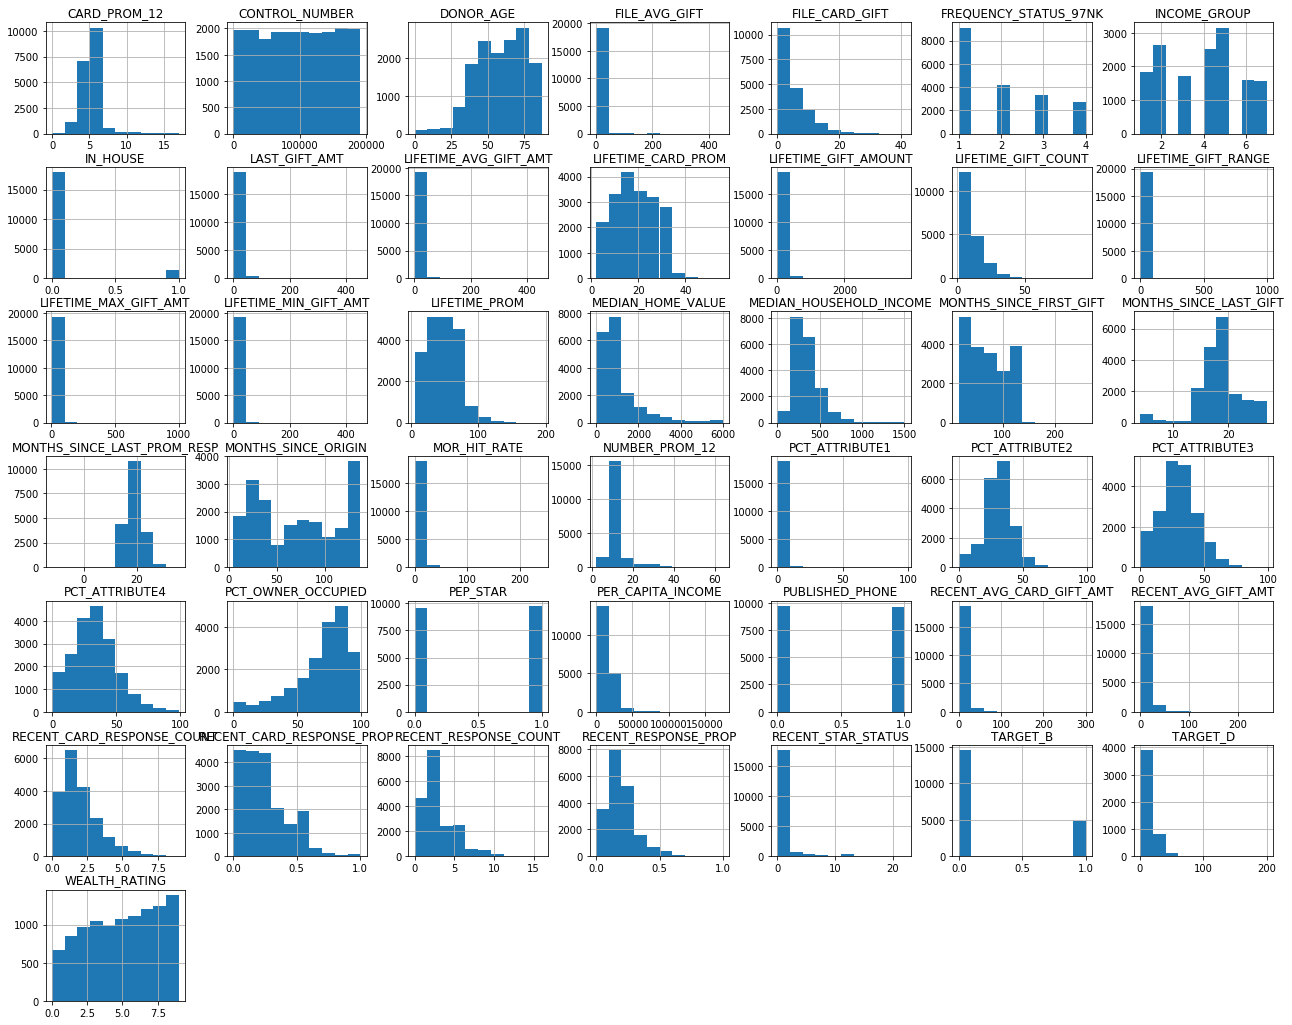

In [51]:
donor_data.hist(figsize=(22,18))
plt.show()

##### Data Distributions (Histograms) - After Data Preparation

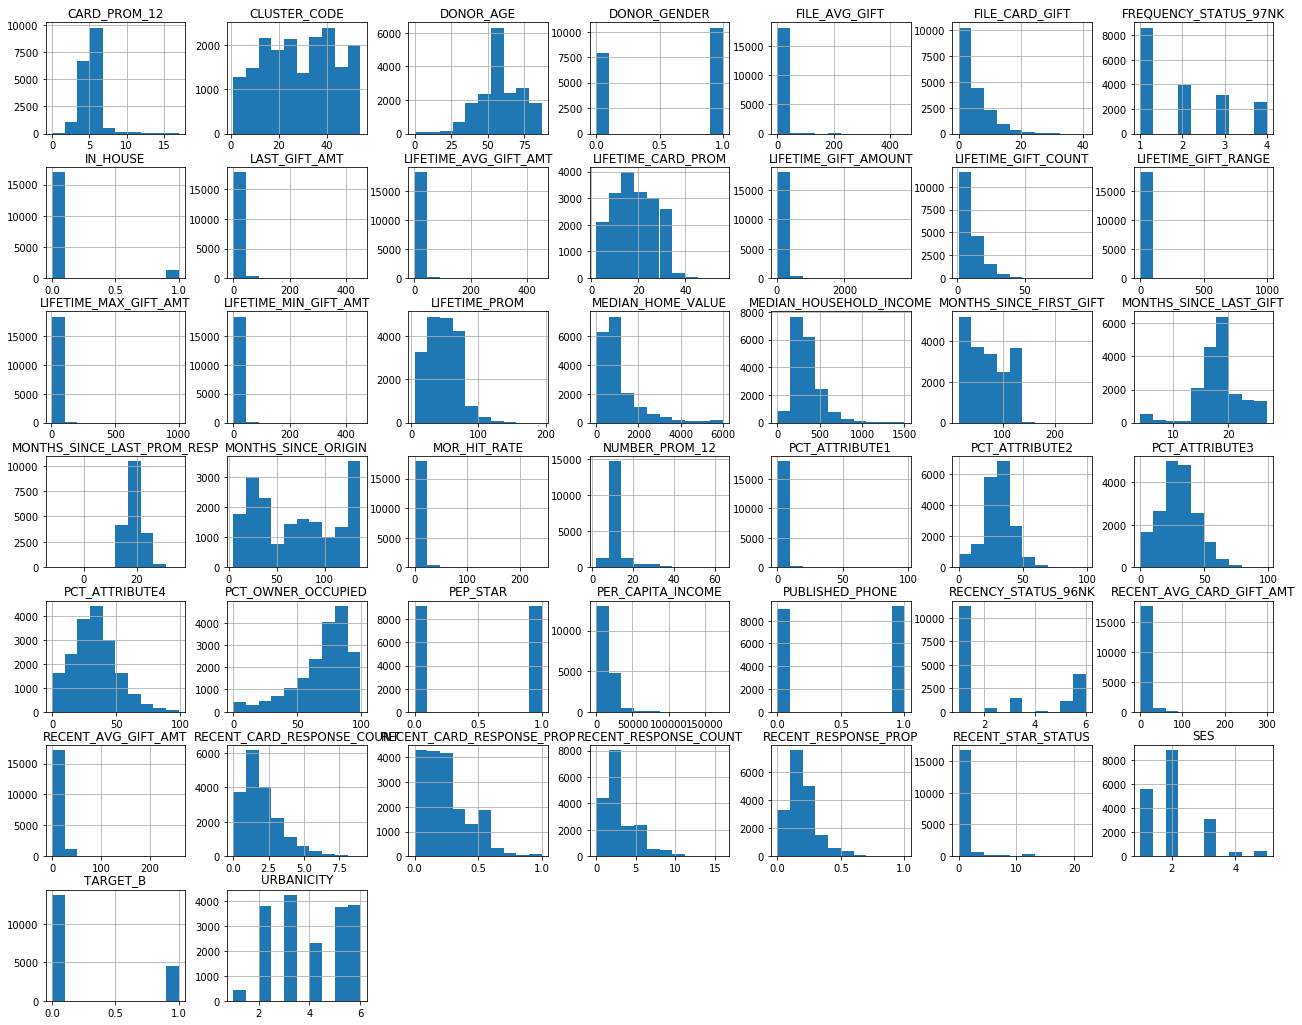

In [52]:
donor_dataset.hist(figsize=(22,18))
plt.show()

### [ TARGET_B ]

The shape is:  (18354, 44)
0=no 1=yes 
 TARGET_B
0    13783
1     4571
dtype: int64


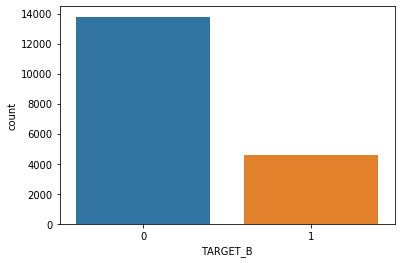

In [53]:
print('The shape is: ', donor_dataset.shape)
print('0=no 1=yes','\n',donor_dataset.groupby('TARGET_B').size())
sns.countplot(donor_dataset['TARGET_B'])

### TARGET_B (response to sollicitation) 0 = No , 1 = Yes
- Of these 18354 data points, 13783 are labeled as 0 and 4571 as 1:
    - Unbalanced DataSet

### Prepare Data for Scaling

In [54]:
donor_dataset

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,101,87.0,0,1,5,54,0,0,0,554,294,76,11855,0,0,0,0,1,0,1,1,0.067,15.00,0.000,0.00,1,0,26.0000,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,137,79.0,0,2,2,45,0,0,0,334,212,72,10385,0,41,21,31,1,1,6,2,0.235,15.00,0.250,15.00,4,2,11.0000,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,113,75.0,0,3,1,11,1,0,0,2388,405,63,30855,0,25,26,57,1,1,6,3,0.409,21.67,0.545,22.67,9,6,14.0000,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,92,60.0,0,4,2,4,1,1,0,1688,153,3,16342,0,25,32,42,1,0,1,3,0.474,13.44,0.400,13.50,9,4,11.0000,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,101,74.0,0,2,2,49,1,1,8,514,328,90,12107,0,33,36,37,0,0,1,1,0.100,17.50,0.111,10.00,2,1,18.0000,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,89,66.0,1,4,1,3,1,1,241,1224,411,53,17457,1,24,34,41,0,0,1,2,0.154,15.00,0.167,15.00,2,1,18.0000,18,50,103.0,6,17.17,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,137,77.0,1,6,1,24,1,1,240,778,388,67,18431,3,36,28,56,1,1,6,3,0.200,9.00,0.200,10.00,4,2,21.0000,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,29,60.0,1,3,1,11,0,1,0,383,203,74,11971,0,41,20,58,0,0,5,1,0.000,0.00,0.000,0.00,0,0,19.0389,5,14,15.0,1,15.00,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,129,78.0,1,1,5,54,0,1,0,1861,421,84,22294,0,0,0,0,1,14,1,1,0.053,25.00,0.000,0.00,1,0,23.0000,31,99,440.0,24,18.33,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


In [55]:
TARGET_B = donor_dataset['TARGET_B']
print(TARGET_B.shape, type(TARGET_B))
TARGET_B

(18354,) <class 'pandas.core.series.Series'>


0        0
1        1
2        0
3        0
4        0
        ..
19367    0
19368    0
19369    0
19370    0
19371    1
Name: TARGET_B, Length: 18354, dtype: int64

In [56]:
TARGET_B_np = TARGET_B.to_numpy()
print(TARGET_B_np.shape, type(TARGET_B_np))
TARGET_B_np

(18354,) <class 'numpy.ndarray'>


array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [57]:
TARGET_B_df = pd.DataFrame(TARGET_B_np)
TARGET_B_df.columns = ['TARGET_B']
print(TARGET_B_df.shape, type(TARGET_B_df))
TARGET_B_df

(18354, 1) <class 'pandas.core.frame.DataFrame'>


,TARGET_B
0,0
1,1
2,0
3,0
4,0
...,...
18349,0
18350,0
18351,0
18352,0


In [58]:
donor_dataset2 = donor_dataset.drop('TARGET_B',axis=1)

In [59]:
print(donor_dataset2.shape)
donor_dataset2.tail()

(18354, 43)


,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
19367,89,66.0,1,4,1,3,1,1,241,1224,411,53,17457,1,24,34,41,0,0,1,2,0.154,15.0,0.167,15.0,2,1,18.0000,18,50,103.0,6,17.17,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,137,77.0,1,6,1,24,1,1,240,778,388,67,18431,3,36,28,56,1,1,6,3,0.200,9.0,0.200,10.0,4,2,21.0000,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,29,60.0,1,3,1,11,0,1,0,383,203,74,11971,0,41,20,58,0,0,5,1,0.000,0.0,0.000,0.0,0,0,19.0389,5,14,15.0,1,15.00,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,129,78.0,1,1,5,54,0,1,0,1861,421,84,22294,0,0,0,0,1,14,1,1,0.053,25.0,0.000,0.0,1,0,23.0000,31,99,440.0,24,18.33,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11
19371,29,70.0,0,1,5,54,0,1,2,1432,636,98,35544,0,62,13,61,0,0,5,1,0.100,25.0,0.250,25.0,1,1,24.0000,7,18,25.0,1,25.00,0.0,25.0,25.0,25.0,4,9,24,24,25.00,1


In [60]:
print(donor_dataset2.columns)

Index(['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES',
       'CLUSTER_CODE', 'DONOR_GENDER', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2',
       'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT'],
      d

- **TARGET_B_df**
- **donor_dataset2**

##  Scaling

##### Standard Scaler

In [61]:
# create StandardScaler() object
scaler_standard = preprocessing.StandardScaler()

# transform data and store it in scaled_standard
scaled_standard = scaler_standard.fit_transform(donor_dataset2)

# convert scaled_standard to DataFrame
scaled_standard_df = pd.DataFrame(scaled_standard, columns=['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES',
       'CLUSTER_CODE', 'DONOR_GENDER', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2',
       'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT'])

In [62]:
print(scaled_standard_df.shape)
scaled_standard_df.tail()

(18354, 43)


,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
18349,0.390331,0.468646,3.533507,0.059045,-1.116013,-1.723905,0.874436,0.985289,24.534314,0.151421,0.418036,-0.777418,0.183606,-0.004363,-0.585140,0.287085,0.454621,-1.000436,-0.363984,-0.722585,0.014880,-0.316185,-0.037725,-0.341054,0.302103,-0.508830,-0.473998,-0.304507,-0.069706,0.112045,-0.008402,-0.450179,0.483462,0.683985,0.355529,-0.579747,-0.133485,0.499476,0.015654,-0.046932,0.317897,0.483462,-0.484232
18350,1.555826,1.220779,3.533507,1.379840,-1.116013,-0.303621,0.874436,0.985289,24.431026,-0.312764,0.277991,-0.130165,0.295453,0.406274,0.470329,-0.110883,1.297415,0.999564,0.032842,1.642562,0.925227,0.090990,-0.624617,-0.163038,-0.156141,0.470005,0.178500,0.578884,1.567978,1.243868,0.566504,1.273466,-0.572899,-0.167632,-0.566563,-0.828696,-0.550397,0.499476,0.015654,0.699511,1.623337,-0.572899,1.691486
18351,-1.066538,0.058392,3.533507,-0.601352,-1.116013,-1.182844,-1.143594,0.985289,-0.358092,-0.723869,-0.848462,0.193461,-0.446367,-0.209681,0.910107,-0.641505,1.409788,-1.000436,-0.363984,1.169533,-0.895467,-1.679336,-1.504954,-1.241918,-1.072628,-1.487666,-1.126496,0.001412,-1.590413,-1.455094,-0.837775,-1.024727,0.238558,-0.757212,-0.259199,0.913942,-0.133485,-1.889107,-0.842643,1.197140,-1.227318,0.238558,-1.136947
18352,1.361577,1.289154,3.533507,-1.922147,3.477169,1.725357,-1.143594,0.985289,-0.358092,0.814393,0.478926,0.655784,0.739053,-0.209681,-2.696077,-1.968062,-1.849017,0.999564,5.191571,-0.722585,-0.895467,-1.210200,0.940427,-1.241918,-1.072628,-0.998248,-1.126496,1.167811,1.451001,2.245096,3.167720,1.618196,0.614378,0.552967,0.355529,-0.330799,0.700340,1.295670,2.375970,-2.535078,1.596696,0.614378,1.256342
18353,-1.066538,0.742149,-0.283005,-1.922147,3.477169,1.725357,-1.143594,0.985289,-0.151516,0.367901,1.788046,1.303036,2.260588,-0.209681,2.757177,-1.105800,1.578347,-1.000436,-0.363984,1.169533,-0.895467,-0.794173,0.940427,0.106681,1.218590,-0.998248,-0.473998,1.462275,-1.356458,-1.280967,-0.743528,-1.024727,1.367148,-0.757212,0.355529,2.158683,0.700340,-1.092913,-0.842643,1.445955,-1.200677,1.367148,-0.919375


In [63]:
donor_dataset_scaled_standard = TARGET_B_df.join(scaled_standard_df, how='right')

In [64]:
donor_dataset_scaled_standard

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,0.681705,1.904536,-0.283005,-1.922147,3.477169,1.725357,-1.143594,-1.014931,-0.358092,-0.545897,-0.294369,0.285925,-0.459688,-0.209681,-2.696077,-1.968062,-1.849017,0.999564,-0.363984,-0.722585,-0.895467,-1.086277,-0.037725,-1.241918,-1.072628,-0.998248,-1.126496,2.051202,0.047272,-0.105613,1.819989,2.882202,-0.496155,0.225422,0.048165,-0.330799,-0.133485,-0.296718,-0.198920,1.943584,0.610955,-0.496155,0.386055
1,1,1.555826,1.357530,-0.283005,-1.261750,0.032283,1.116664,-1.143594,-1.014931,-0.358092,-0.774867,-0.793661,0.100996,-0.628492,-0.209681,0.910107,-0.575178,-0.107242,0.999564,0.032842,1.642562,0.014880,0.400797,-0.037725,0.106681,0.302103,0.470005,0.178500,-2.365752,1.567978,1.853311,2.489142,1.733105,0.206957,0.552967,0.355529,-0.330799,0.033280,1.295670,1.732248,-2.783892,1.410204,0.206957,1.473914
2,0,0.973078,1.084027,-0.283005,-0.601352,-1.116013,-1.182844,0.874436,-1.014931,-0.358092,1.362880,0.381503,-0.315095,1.722137,-0.209681,-0.497184,-0.243538,1.353601,0.999564,0.032842,1.642562,0.925227,1.940981,0.614702,1.698029,1.005048,2.917094,2.788492,-1.482361,2.971708,3.115729,4.703945,2.997112,0.436061,0.749494,0.539947,-0.330799,0.200045,4.480448,4.092564,-3.032707,0.957296,0.436061,2.344201
3,0,0.463174,0.058392,-0.283005,0.059045,0.032283,-1.656272,0.874436,0.985289,-0.358092,0.634339,-1.152908,-3.089033,0.055567,-0.209681,-0.497184,0.154429,0.510807,0.999564,-0.363984,-0.722585,0.925227,2.516337,-0.190317,0.915841,0.164630,2.917094,1.483496,-2.365752,1.451001,2.114501,3.120596,3.112021,-0.127106,0.159913,-0.136254,-0.579747,-0.133485,4.480448,4.307138,-3.032707,0.610955,-0.127106,1.473914
4,0,0.681705,1.015651,-0.283005,-1.261750,0.032283,1.387194,0.874436,0.985289,0.468212,-0.587528,-0.087345,0.933178,-0.430750,-0.209681,0.206462,0.419740,0.229876,-1.000436,-0.363984,-0.722585,-0.895467,-0.794173,0.206813,-0.643140,-0.156141,-0.508830,-0.473998,-0.304507,1.334023,1.548590,0.019872,0.239279,-0.457782,0.552967,0.355529,-0.330799,0.700340,0.499476,1.303099,-0.046932,0.610955,-0.457782,-0.484232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18349,0,0.390331,0.468646,3.533507,0.059045,-1.116013,-1.723905,0.874436,0.985289,24.534314,0.151421,0.418036,-0.777418,0.183606,-0.004363,-0.585140,0.287085,0.454621,-1.000436,-0.363984,-0.722585,0.014880,-0.316185,-0.037725,-0.341054,0.302103,-0.508830,-0.473998,-0.304507,-0.069706,0.112045,-0.008402,-0.450179,0.483462,0.683985,0.355529,-0.579747,-0.133485,0.499476,0.015654,-0.046932,0.317897,0.483462,-0.484232
18350,0,1.555826,1.220779,3.533507,1.379840,-1.116013,-0.303621,0.874436,0.985289,24.431026,-0.312764,0.277991,-0.130165,0.295453,0.406274,0.470329,-0.110883,1.297415,0.999564,0.032842,1.642562,0.925227,0.090990,-0.624617,-0.163038,-0.156141,0.470005,0.178500,0.578884,1.567978,1.243868,0.566504,1.273466,-0.572899,-0.167632,-0.566563,-0.828696,-0.550397,0.499476,0.015654,0.699511,1.623337,-0.572899,1.691486
18351,0,-1.066538,0.058392,3.533507,-0.601352,-1.116013,-1.182844,-1.143594,0.985289,-0.358092,-0.723869,-0.848462,0.193461,-0.446367,-0.209681,0.910107,-0.641505,1.4097

##### Robust Scaler

In [65]:
# create RobustScaler() object
scaler_robust = preprocessing.RobustScaler()

# transform data and store it in scaled_robust
scaled_robust = scaler_robust.fit_transform(donor_dataset2)

# convert scaled_robust to DataFrame
scaled_robust_df = pd.DataFrame(scaled_robust, columns=['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES',
       'CLUSTER_CODE', 'DONOR_GENDER', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2',
       'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT'])

In [66]:
print(scaled_robust_df.shape)
scaled_robust_df.tail()

(18354, 43)


,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
18349,0.285714,0.315789,1.0,0.0,-1.0,-1.00,0.0,0.0,80.333333,0.677511,0.540541,-0.92,0.490234,1.0,-0.583333,0.263158,0.409091,-1.0,0.0,0.00,0.0,-0.089655,0.1,-0.141631,0.431818,-0.5,0.0,0.000000,0.000000,0.083333,0.266667,-0.2,0.857864,1.2,1.000000,-0.285714,0.0,0.0,0.5,0.00,0.225352,0.857864,-0.166667
18350,0.857143,0.894737,1.0,1.0,-1.0,-0.16,0.0,0.0,80.000000,0.046676,0.416216,-0.36,0.621214,3.0,0.416667,-0.052632,1.090909,0.0,1.0,1.25,0.5,0.227586,-0.5,0.000000,-0.022727,0.5,1.0,0.750000,1.000000,0.805556,0.944444,1.3,-0.492785,-0.1,-0.666667,-0.571429,-0.5,0.0,0.5,0.75,0.915493,-0.492785,1.500000
18351,-0.428571,0.000000,1.0,-0.5,-1.0,-0.68,-1.0,0.0,0.000000,-0.512023,-0.583784,-0.08,-0.247504,0.0,0.833333,-0.473684,1.181818,-1.0,0.0,1.00,-0.5,-1.151724,-1.4,-0.858369,-0.931818,-1.5,-1.0,0.259725,-0.928571,-0.916667,-0.711111,-0.7,0.544733,-1.0,-0.111111,1.428571,0.0,-3.0,-1.5,1.25,-0.591549,0.544733,-0.666667
18352,0.761905,0.947368,1.0,-1.5,3.0,1.04,-1.0,0.0,0.000000,1.578501,0.594595,0.32,1.140696,0.0,-2.583333,-1.526316,-1.454545,0.0,14.0,0.00,-0.5,-0.786207,1.1,-0.858369,-0.931818,-1.0,-1.0,1.250000,0.928571,1.444444,4.011111,1.6,1.025253,1.0,1.000000,0.000000,1.0,1.0,6.0,-2.50,0.901408,1.025253,1.166667
18353,-0.428571,0.526316,0.0,-1.5,3.0,1.04,-1.0,0.0,0.666667,0.971711,1.756757,0.88,2.922508,0.0,2.583333,-0.842105,1.318182,-1.0,0.0,1.00,-0.5,-0.462069,1.1,0.214592,1.340909,-1.0,0.0,1.500000,-0.785714,-0.805556,-0.600000,-0.7,1.987734,-1.0,1.000000,2.857143,1.0,-2.0,-1.5,1.50,-0.577465,1.987734,-0.500000


In [67]:
donor_dataset_scaled_robust = TARGET_B_df.join(scaled_robust_df, how='right')

In [68]:
donor_dataset_scaled_robust

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,0.428571,1.421053,0.0,-1.5,3.0,1.04,-1.0,-1.0,0.000000,-0.270156,-0.091892,0.00,-0.263103,0.0,-2.583333,-1.526316,-1.454545,0.0,0.0,0.00,-0.5,-0.689655,0.100,-0.858369,-0.931818,-1.0,-1.0,2.000000,0.071429,-0.055556,2.422222,2.7,-0.394661,0.5,0.444444,0.000000,0.0,-1.0,0.0,2.00,0.380282,-0.394661,0.500000
1,1,0.857143,1.000000,0.0,-1.0,0.0,0.68,-1.0,-1.0,0.000000,-0.581330,-0.535135,-0.16,-0.460783,0.0,0.833333,-0.421053,-0.045455,0.0,1.0,1.25,0.0,0.468966,0.100,0.214592,0.431818,0.5,1.0,-1.750000,1.000000,1.194444,3.211111,1.7,0.504329,1.0,1.000000,0.000000,0.2,1.0,4.5,-2.75,0.802817,0.504329,1.333333
2,0,0.571429,0.789474,0.0,-0.5,-1.0,-0.68,0.0,-1.0,0.000000,2.323904,0.508108,-0.52,2.291948,0.0,-0.500000,-0.157895,1.136364,0.0,1.0,1.25,0.5,1.668966,0.767,1.480687,1.129091,3.0,5.0,-1.000000,1.857143,2.000000,5.822222,2.8,0.797258,1.3,1.333333,0.000000,0.4,5.0,10.0,-3.00,0.563380,0.797258,2.000000
3,0,0.321429,0.000000,0.0,0.0,0.0,-0.96,0.0,0.0,0.000000,1.333805,-0.854054,-2.92,0.340292,0.0,-0.500000,0.157895,0.454545,0.0,0.0,0.00,0.5,2.117241,-0.056,0.858369,0.295455,3.0,3.0,-1.750000,0.928571,1.361111,3.955556,2.9,0.077201,0.4,0.111111,-0.285714,0.0,5.0,10.5,-3.00,0.380282,0.077201,1.333333
4,0,0.428571,0.736842,0.0,-1.0,0.0,0.84,0.0,0.0,2.666667,-0.326733,0.091892,0.56,-0.229215,0.0,0.166667,0.368421,0.227273,-1.0,0.0,0.00,-0.5,-0.462069,0.350,-0.381974,-0.022727,-0.5,0.0,0.000000,0.857143,1.000000,0.300000,0.4,-0.345599,1.0,1.000000,0.000000,1.0,0.0,3.5,0.00,0.380282,-0.345599,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18349,0,0.285714,0.315789,1.0,0.0,-1.0,-1.00,0.0,0.0,80.333333,0.677511,0.540541,-0.92,0.490234,1.0,-0.583333,0.263158,0.409091,-1.0,0.0,0.00,0.0,-0.089655,0.100,-0.141631,0.431818,-0.5,0.0,0.000000,0.000000,0.083333,0.266667,-0.2,0.857864,1.2,1.000000,-0.285714,0.0,0.0,0.5,0.00,0.225352,0.857864,-0.166667
18350,0,0.857143,0.894737,1.0,1.0,-1.0,-0.16,0.0,0.0,80.000000,0.046676,0.416216,-0.36,0.621214,3.0,0.416667,-0.052632,1.090909,0.0,1.0,1.25,0.5,0.227586,-0.500,0.000000,-0.022727,0.5,1.0,0.750000,1.000000,0.805556,0.944444,1.3,-0.492785,-0.1,-0.666667,-0.571429,-0.5,0.0,0.5,0.75,0.915493,-0.492785,1.500000
18351,0,-0.428571,0.000000,1.0,-0.5,-1.0,-0.68,-1.0,0.0,0.000000,-0.512023,-0.583784,-0.08,-0.247504,0.0,0.833333,-0.473684,1.181818,-1.0,0.0,1.00,-0.5,-1.151724,-1.400,-0.858369,-0.931818,-1.5,-1.0,0.259725,-0.928571,-0.916667,-0.711111,-0.7,0.544733,-1.0,-0.111111,1.428571,0.0,-3.0,-1.5,1.25,-0.591549,0.544733,-0.666667
18352,0,0.761905,0.947368,1.0,-1.5,3.0,1.04,-1.0,0.0,0.000000,1.578501,0.594595,0.32,1.140696,0.0,-2.583333,-1.526316,-1.454545,0.0,14.0,0.00,-0.5,-0.786207,1.100,-0.858369,-0.931818,-1.0,-1.0,1.250000,0.928571,1.444444,4.011111,1.6,1.025253,1.0,1.000000,0.000000,1.0,1.0,6.0,-2.50,0.901408,1.025253,1.166667


##### Comparison

**Standard Scaler**

In [69]:
donor_dataset_scaled_standard

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,0.681705,1.904536,-0.283005,-1.922147,3.477169,1.725357,-1.143594,-1.014931,-0.358092,-0.545897,-0.294369,0.285925,-0.459688,-0.209681,-2.696077,-1.968062,-1.849017,0.999564,-0.363984,-0.722585,-0.895467,-1.086277,-0.037725,-1.241918,-1.072628,-0.998248,-1.126496,2.051202,0.047272,-0.105613,1.819989,2.882202,-0.496155,0.225422,0.048165,-0.330799,-0.133485,-0.296718,-0.198920,1.943584,0.610955,-0.496155,0.386055
1,1,1.555826,1.357530,-0.283005,-1.261750,0.032283,1.116664,-1.143594,-1.014931,-0.358092,-0.774867,-0.793661,0.100996,-0.628492,-0.209681,0.910107,-0.575178,-0.107242,0.999564,0.032842,1.642562,0.014880,0.400797,-0.037725,0.106681,0.302103,0.470005,0.178500,-2.365752,1.567978,1.853311,2.489142,1.733105,0.206957,0.552967,0.355529,-0.330799,0.033280,1.295670,1.732248,-2.783892,1.410204,0.206957,1.473914
2,0,0.973078,1.084027,-0.283005,-0.601352,-1.116013,-1.182844,0.874436,-1.014931,-0.358092,1.362880,0.381503,-0.315095,1.722137,-0.209681,-0.497184,-0.243538,1.353601,0.999564,0.032842,1.642562,0.925227,1.940981,0.614702,1.698029,1.005048,2.917094,2.788492,-1.482361,2.971708,3.115729,4.703945,2.997112,0.436061,0.749494,0.539947,-0.330799,0.200045,4.480448,4.092564,-3.032707,0.957296,0.436061,2.344201
3,0,0.463174,0.058392,-0.283005,0.059045,0.032283,-1.656272,0.874436,0.985289,-0.358092,0.634339,-1.152908,-3.089033,0.055567,-0.209681,-0.497184,0.154429,0.510807,0.999564,-0.363984,-0.722585,0.925227,2.516337,-0.190317,0.915841,0.164630,2.917094,1.483496,-2.365752,1.451001,2.114501,3.120596,3.112021,-0.127106,0.159913,-0.136254,-0.579747,-0.133485,4.480448,4.307138,-3.032707,0.610955,-0.127106,1.473914
4,0,0.681705,1.015651,-0.283005,-1.261750,0.032283,1.387194,0.874436,0.985289,0.468212,-0.587528,-0.087345,0.933178,-0.430750,-0.209681,0.206462,0.419740,0.229876,-1.000436,-0.363984,-0.722585,-0.895467,-0.794173,0.206813,-0.643140,-0.156141,-0.508830,-0.473998,-0.304507,1.334023,1.548590,0.019872,0.239279,-0.457782,0.552967,0.355529,-0.330799,0.700340,0.499476,1.303099,-0.046932,0.610955,-0.457782,-0.484232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18349,0,0.390331,0.468646,3.533507,0.059045,-1.116013,-1.723905,0.874436,0.985289,24.534314,0.151421,0.418036,-0.777418,0.183606,-0.004363,-0.585140,0.287085,0.454621,-1.000436,-0.363984,-0.722585,0.014880,-0.316185,-0.037725,-0.341054,0.302103,-0.508830,-0.473998,-0.304507,-0.069706,0.112045,-0.008402,-0.450179,0.483462,0.683985,0.355529,-0.579747,-0.133485,0.499476,0.015654,-0.046932,0.317897,0.483462,-0.484232
18350,0,1.555826,1.220779,3.533507,1.379840,-1.116013,-0.303621,0.874436,0.985289,24.431026,-0.312764,0.277991,-0.130165,0.295453,0.406274,0.470329,-0.110883,1.297415,0.999564,0.032842,1.642562,0.925227,0.090990,-0.624617,-0.163038,-0.156141,0.470005,0.178500,0.578884,1.567978,1.243868,0.566504,1.273466,-0.572899,-0.167632,-0.566563,-0.828696,-0.550397,0.499476,0.015654,0.699511,1.623337,-0.572899,1.691486
18351,0,-1.066538,0.058392,3.533507,-0.601352,-1.116013,-1.182844,-1.143594,0.985289,-0.358092,-0.723869,-0.848462,0.193461,-0.446367,-0.209681,0.910107,-0.641505,1.4097

**Robust Scaler**

In [70]:
donor_dataset_scaled_robust

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,0.428571,1.421053,0.0,-1.5,3.0,1.04,-1.0,-1.0,0.000000,-0.270156,-0.091892,0.00,-0.263103,0.0,-2.583333,-1.526316,-1.454545,0.0,0.0,0.00,-0.5,-0.689655,0.100,-0.858369,-0.931818,-1.0,-1.0,2.000000,0.071429,-0.055556,2.422222,2.7,-0.394661,0.5,0.444444,0.000000,0.0,-1.0,0.0,2.00,0.380282,-0.394661,0.500000
1,1,0.857143,1.000000,0.0,-1.0,0.0,0.68,-1.0,-1.0,0.000000,-0.581330,-0.535135,-0.16,-0.460783,0.0,0.833333,-0.421053,-0.045455,0.0,1.0,1.25,0.0,0.468966,0.100,0.214592,0.431818,0.5,1.0,-1.750000,1.000000,1.194444,3.211111,1.7,0.504329,1.0,1.000000,0.000000,0.2,1.0,4.5,-2.75,0.802817,0.504329,1.333333
2,0,0.571429,0.789474,0.0,-0.5,-1.0,-0.68,0.0,-1.0,0.000000,2.323904,0.508108,-0.52,2.291948,0.0,-0.500000,-0.157895,1.136364,0.0,1.0,1.25,0.5,1.668966,0.767,1.480687,1.129091,3.0,5.0,-1.000000,1.857143,2.000000,5.822222,2.8,0.797258,1.3,1.333333,0.000000,0.4,5.0,10.0,-3.00,0.563380,0.797258,2.000000
3,0,0.321429,0.000000,0.0,0.0,0.0,-0.96,0.0,0.0,0.000000,1.333805,-0.854054,-2.92,0.340292,0.0,-0.500000,0.157895,0.454545,0.0,0.0,0.00,0.5,2.117241,-0.056,0.858369,0.295455,3.0,3.0,-1.750000,0.928571,1.361111,3.955556,2.9,0.077201,0.4,0.111111,-0.285714,0.0,5.0,10.5,-3.00,0.380282,0.077201,1.333333
4,0,0.428571,0.736842,0.0,-1.0,0.0,0.84,0.0,0.0,2.666667,-0.326733,0.091892,0.56,-0.229215,0.0,0.166667,0.368421,0.227273,-1.0,0.0,0.00,-0.5,-0.462069,0.350,-0.381974,-0.022727,-0.5,0.0,0.000000,0.857143,1.000000,0.300000,0.4,-0.345599,1.0,1.000000,0.000000,1.0,0.0,3.5,0.00,0.380282,-0.345599,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18349,0,0.285714,0.315789,1.0,0.0,-1.0,-1.00,0.0,0.0,80.333333,0.677511,0.540541,-0.92,0.490234,1.0,-0.583333,0.263158,0.409091,-1.0,0.0,0.00,0.0,-0.089655,0.100,-0.141631,0.431818,-0.5,0.0,0.000000,0.000000,0.083333,0.266667,-0.2,0.857864,1.2,1.000000,-0.285714,0.0,0.0,0.5,0.00,0.225352,0.857864,-0.166667
18350,0,0.857143,0.894737,1.0,1.0,-1.0,-0.16,0.0,0.0,80.000000,0.046676,0.416216,-0.36,0.621214,3.0,0.416667,-0.052632,1.090909,0.0,1.0,1.25,0.5,0.227586,-0.500,0.000000,-0.022727,0.5,1.0,0.750000,1.000000,0.805556,0.944444,1.3,-0.492785,-0.1,-0.666667,-0.571429,-0.5,0.0,0.5,0.75,0.915493,-0.492785,1.500000
18351,0,-0.428571,0.000000,1.0,-0.5,-1.0,-0.68,-1.0,0.0,0.000000,-0.512023,-0.583784,-0.08,-0.247504,0.0,0.833333,-0.473684,1.181818,-1.0,0.0,1.00,-0.5,-1.151724,-1.400,-0.858369,-0.931818,-1.5,-1.0,0.259725,-0.928571,-0.916667,-0.711111,-0.7,0.544733,-1.0,-0.111111,1.428571,0.0,-3.0,-1.5,1.25,-0.591549,0.544733,-0.666667
18352,0,0.761905,0.947368,1.0,-1.5,3.0,1.04,-1.0,0.0,0.000000,1.578501,0.594595,0.32,1.140696,0.0,-2.583333,-1.526316,-1.454545,0.0,14.0,0.00,-0.5,-0.786207,1.100,-0.858369,-0.931818,-1.0,-1.0,1.250000,0.928571,1.444444,4.011111,1.6,1.025253,1.0,1.000000,0.000000,1.0,1.0,6.0,-2.50,0.901408,1.025253,1.166667


<a id='About_Algorithms'><a/>

[**Table of Content**](#Table_of_Content)

# 5. About Algorithms

###  Test Harness

Stratified 10-fold cross validation will be used to estimate model accuracy.

This will split the dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

The random seed will be set via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

The metric of **'accuracy'** will be used to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate).

###  Build Models

Not knowing which algorithm would be good for this project and what configuration,  9 different algorithms will be tested.

Algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART)
- Random Forest Decision Tree (RFTree)
- Gradient Boosting (GrB)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)
- Deep Learning (Deep)

This is a good mixture of **simple linear (LR and LDA)**, **nonlinear (KNN, CART, NB, SVM and ....)** algorithms.

<a id='Evaluate_Some_Algorithms'><a/>

[**Table of Content**](#Table_of_Content)

# 6. Evaluate Some Algorithms

### 6.1.a Create a Validation Dataset with Standard Scaled Data

The loaded dataset will be split into two:
- 75% to train, evaluate and select among the models 
- 25% as a validation dataset.

In [71]:
# Split-out validation dataset

X = donor_dataset_scaled_standard.drop('TARGET_B',axis=1)
y = donor_dataset_scaled_standard['TARGET_B']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1)

In [72]:
print ('All Data: ', X.size)
print ('Train Size: ', X_train.size,'=', X_train.size/ X.size*100,'%')
print ('Test Size: ', X_validation.size, '=', X_validation.size/X.size*100,'%')

All Data:  789222
Train Size:  591895 = 74.99727579819113 %
Test Size:  197327 = 25.002724201808867 %


### 6.2.a Build Models, Make and Evaluate Predictions on different models with Standard Scaled Data


Estimate Model Accuracy: mean (std) 
LR: 0.749001 (0.002130) 

Prediction: LR
Accuracy Score: 0.7583351492699935

Confusion Matrix:
 [[3462   21]
 [1088   18]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3483
           1       0.46      0.02      0.03      1106

    accuracy                           0.76      4589
   macro avg       0.61      0.51      0.45      4589
weighted avg       0.69      0.76      0.66      4589



Prediction probabilities distribution: LR


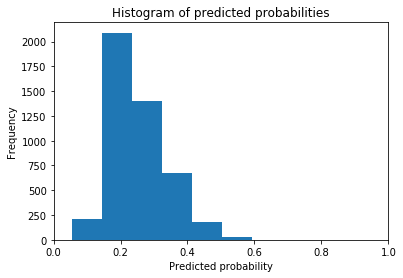


ROC curve for classifier: LR


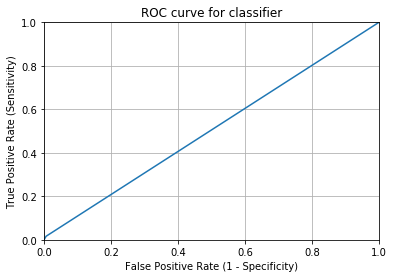

AUC for classifier: LR  =  0.6130037967934151

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
LDA: 0.748275 (0.003000) 

Prediction: LDA
Accuracy Score: 0.7592067988668555

Confusion Matrix:
 [[3456   27]
 [1078   28]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3483
           1       0.51      0.03      0.05      1106

    accuracy                           0.76      4589
   macro avg       0.64      0.51      0.46      4589
weighted avg       0.70      0.76      0.67      4589



Prediction probabilities distribution: LDA


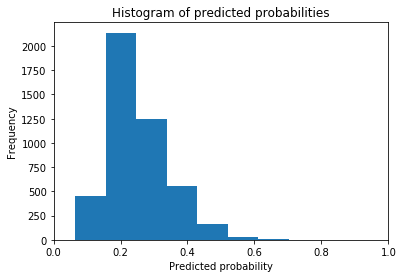


ROC curve for classifier: LDA


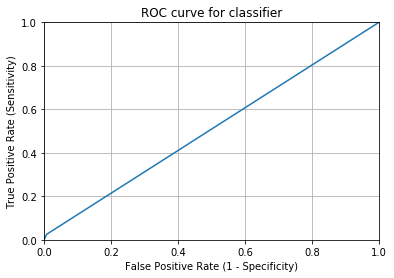

AUC for classifier: LDA  =  0.6120910711235508

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
KNN: 0.702579 (0.004318) 

Prediction: KNN
Accuracy Score: 0.7193288298104162

Confusion Matrix:
 [[3120  363]
 [ 925  181]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83      3483
           1       0.33      0.16      0.22      1106

    accuracy                           0.72      4589
   macro avg       0.55      0.53      0.52      4589
weighted avg       0.67      0.72      0.68      4589



Prediction probabilities distribution: KNN


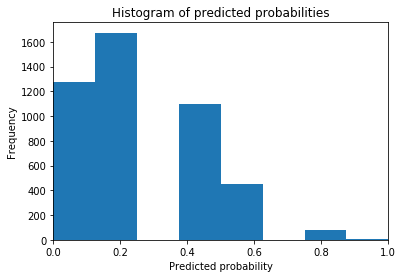


ROC curve for classifier: KNN


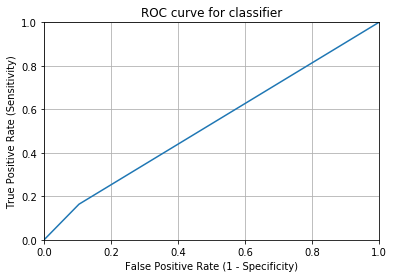

AUC for classifier: KNN  =  0.5405916310636161

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
CART: 0.630076 (0.012278) 

Prediction: CART
Accuracy Score: 0.6302026585312704

Confusion Matrix:
 [[2556  927]
 [ 770  336]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      3483
           1       0.27      0.30      0.28      1106

    accuracy                           0.63      4589
   macro avg       0.52      0.52      0.52      4589
weighted avg       0.65      0.63      0.64      4589



Prediction probabilities distribution: CART


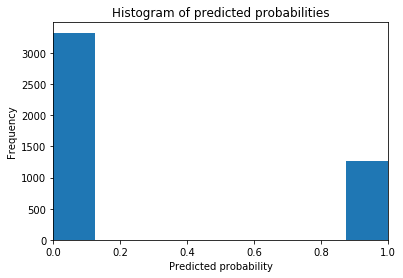


ROC curve for classifier: CART


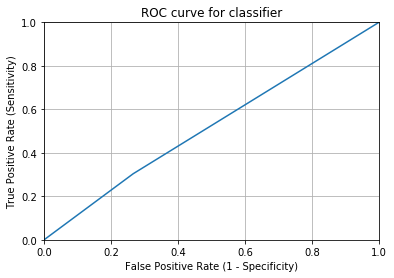

AUC for classifier: CART  =  0.5188237987766984

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
RFTree: 0.747185 (0.002265) 

Prediction: RFTree
Accuracy Score: 0.7578993244715624

Confusion Matrix:
 [[3422   61]
 [1050   56]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      3483
           1       0.48      0.05      0.09      1106

    accuracy                           0.76      4589
   macro avg       0.62      0.52      0.48      4589
weighted avg       0.70      0.76      0.68      4589



Prediction probabilities distribution: RFTree


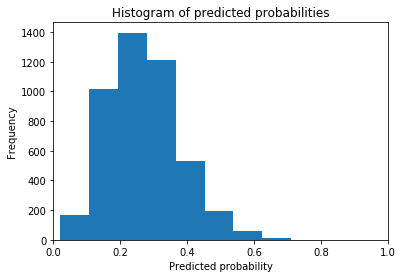


ROC curve for classifier: RFTree


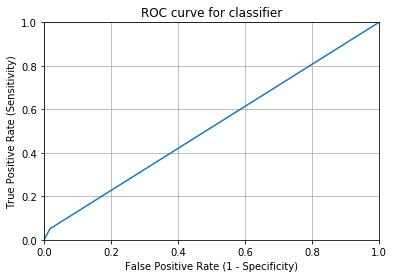

AUC for classifier: RFTree  =  0.5863815930541473

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
GrB: 0.749292 (0.003736) 

Prediction: GrB
Accuracy Score: 0.758553061669209

Confusion Matrix:
 [[3442   41]
 [1067   39]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3483
           1       0.49      0.04      0.07      1106

    accuracy                           0.76      4589
   macro avg       0.63      0.51      0.46      4589
weighted avg       0.70      0.76      0.67      4589



Prediction probabilities distribution: GrB


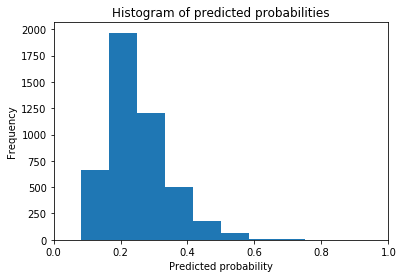


ROC curve for classifier: GrB


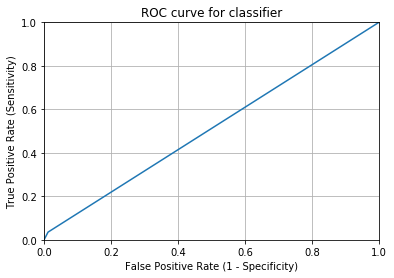

AUC for classifier: GrB  =  0.6184737908072222

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
NB: 0.676644 (0.013823) 

Prediction: NB
Accuracy Score: 0.6868598823273044

Confusion Matrix:
 [[2811  672]
 [ 765  341]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      3483
           1       0.34      0.31      0.32      1106

    accuracy                           0.69      4589
   macro avg       0.56      0.56      0.56      4589
weighted avg       0.68      0.69      0.68      4589



Prediction probabilities distribution: NB


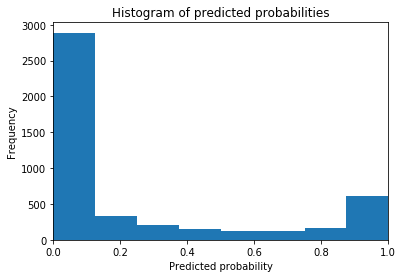


ROC curve for classifier: NB


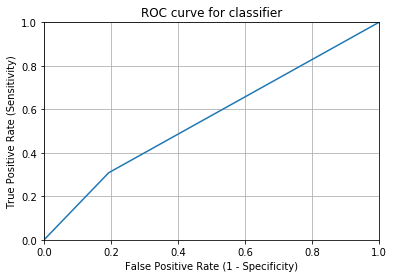

AUC for classifier: NB  =  0.596287885513673

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
SVM: 0.749001 (0.001396) 

Prediction: SVM
Accuracy Score: 0.7596426236652866

Confusion Matrix:
 [[3471   12]
 [1091   15]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      3483
           1       0.56      0.01      0.03      1106

    accuracy                           0.76      4589
   macro avg       0.66      0.51      0.44      4589
weighted avg       0.71      0.76      0.66      4589


An AttributeError has occurred. I can't show the histogram of predicted probabilities, ROC curve for classifier and AUC for the classifier.

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Estimate Model Accuracy: mean (std) 
Deep: 0.702069 (0.009081) 



C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Prediction: Deep
Accuracy Score: 0.7053824362606232

Confusion Matrix:
 [[3045  438]
 [ 914  192]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      3483
           1       0.30      0.17      0.22      1106

    accuracy                           0.71      4589
   macro avg       0.54      0.52      0.52      4589
weighted avg       0.66      0.71      0.67      4589



Prediction probabilities distribution: Deep


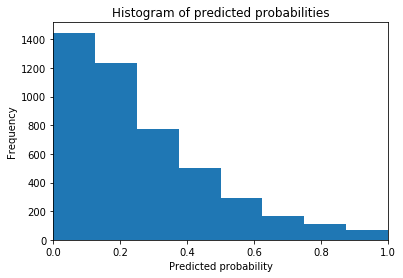


ROC curve for classifier: Deep


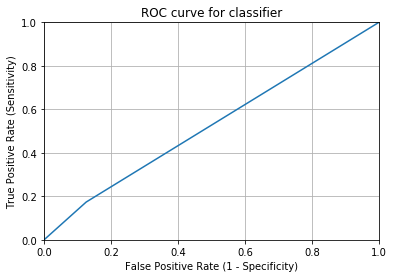

AUC for classifier: Deep  =  0.5457453121568517

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [73]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFTree', RandomForestClassifier()))
models.append(('GrB', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Deep', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
print()

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('Estimate Model Accuracy: mean (std)','\n%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()),'\n')
    
    
    # Make predictions on validation dataset
    
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    # Evaluate predictions
    
    print("Prediction:", '%s' % (name))   
    print('Accuracy Score:',accuracy_score(Y_validation, predictions))
    print()
    print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions))
    print('\n')
    print('Classification Report:\n',classification_report(Y_validation, predictions))
    print()
    
    
    try:
        # store the predicted probabilities for class 1
        Y_pred_prob = model.predict_proba(X_validation)[:, 1]
    
    except AttributeError:
        print("An AttributeError has occurred. I can't show the histogram of predicted probabilities, ROC curve for classifier and AUC for the classifier.")
    
    else:
        
        # histogram of predicted probabilities
        
        print()
        print("Prediction probabilities distribution:", '%s' % (name)) 
        plt.hist(Y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability')
        plt.ylabel('Frequency')
        plt.show()
        
        # ROC curve for classifier
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        print()
        print("ROC curve for classifier:", '%s' % (name)) 
        fpr, tpr, thresholds = metrics.roc_curve(Y_validation, predictions)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.show()

        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        print("AUC for classifier:", '%s' % (name),' = ', metrics.roc_auc_score(Y_validation, Y_pred_prob))
        
        
    print()
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX','\n') 

Plot of **the spread and the mean accuracy** of each model. 

There is a **population of accuracy** measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

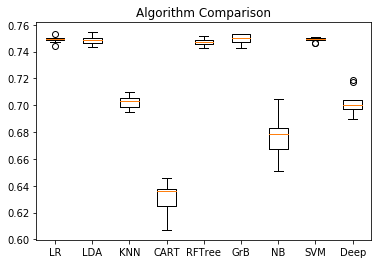

In [74]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

##### For Standard Scaled Data the chosen model is Deep Learning.

### 6.1.b Create a Validation Dataset with Robust Scaled Data

In [75]:
# Split-out validation dataset

X = donor_dataset_scaled_robust.drop('TARGET_B',axis=1)
y = donor_dataset_scaled_robust['TARGET_B']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1)

In [76]:
print ('All Data: ', X.size)
print ('Train Size: ', X_train.size,'=', X_train.size/ X.size*100,'%')
print ('Test Size: ', X_validation.size, '=', X_validation.size/X.size*100,'%')

All Data:  789222
Train Size:  591895 = 74.99727579819113 %
Test Size:  197327 = 25.002724201808867 %


### 6.2.b Build Models, Make and Evaluate Predictions on different models with Robust Scaled Data


Estimate Model Accuracy: mean (std) 
LR: 0.749001 (0.002130) 

Prediction: LR
Accuracy Score: 0.7583351492699935

Confusion Matrix:
 [[3462   21]
 [1088   18]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3483
           1       0.46      0.02      0.03      1106

    accuracy                           0.76      4589
   macro avg       0.61      0.51      0.45      4589
weighted avg       0.69      0.76      0.66      4589



Prediction probabilities distribution: LR


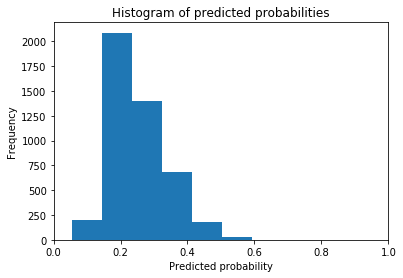


ROC curve for classifier: LR


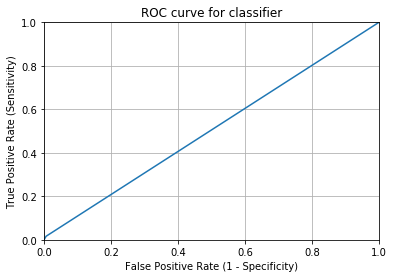

AUC for classifier: LR  =  0.6131335928215528

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
LDA: 0.748275 (0.003000) 

Prediction: LDA
Accuracy Score: 0.7592067988668555

Confusion Matrix:
 [[3456   27]
 [1078   28]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3483
           1       0.51      0.03      0.05      1106

    accuracy                           0.76      4589
   macro avg       0.64      0.51      0.46      4589
weighted avg       0.70      0.76      0.67      4589



Prediction probabilities distribution: LDA


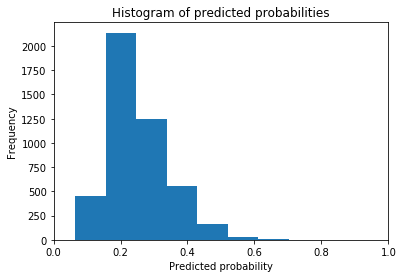


ROC curve for classifier: LDA


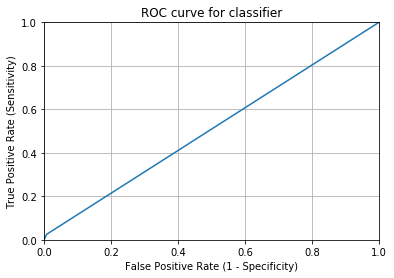

AUC for classifier: LDA  =  0.6120910711235508

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
KNN: 0.709699 (0.004861) 

Prediction: KNN
Accuracy Score: 0.714970581826106

Confusion Matrix:
 [[3126  357]
 [ 951  155]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83      3483
           1       0.30      0.14      0.19      1106

    accuracy                           0.71      4589
   macro avg       0.53      0.52      0.51      4589
weighted avg       0.65      0.71      0.67      4589



Prediction probabilities distribution: KNN


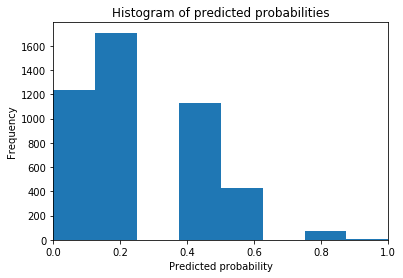


ROC curve for classifier: KNN


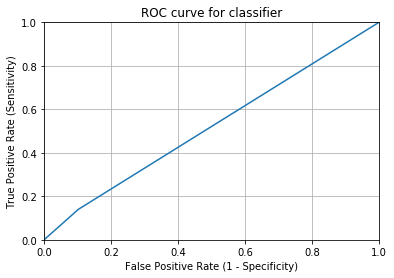

AUC for classifier: KNN  =  0.5514588035194452

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
CART: 0.633056 (0.009845) 

Prediction: CART
Accuracy Score: 0.6291130965351929

Confusion Matrix:
 [[2555  928]
 [ 774  332]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      3483
           1       0.26      0.30      0.28      1106

    accuracy                           0.63      4589
   macro avg       0.52      0.52      0.52      4589
weighted avg       0.65      0.63      0.64      4589



Prediction probabilities distribution: CART


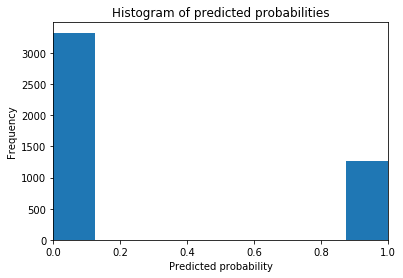


ROC curve for classifier: CART


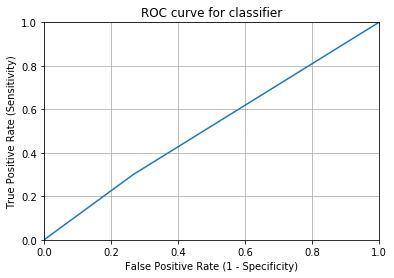

AUC for classifier: CART  =  0.5168719261055637

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
RFTree: 0.746023 (0.002387) 

Prediction: RFTree
Accuracy Score: 0.7583351492699935

Confusion Matrix:
 [[3424   59]
 [1050   56]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      3483
           1       0.49      0.05      0.09      1106

    accuracy                           0.76      4589
   macro avg       0.63      0.52      0.48      4589
weighted avg       0.70      0.76      0.68      4589



Prediction probabilities distribution: RFTree


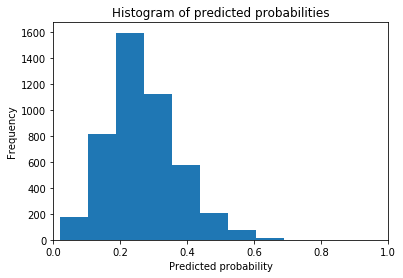


ROC curve for classifier: RFTree


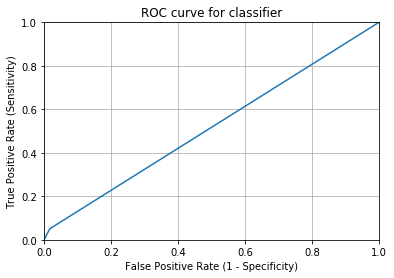

AUC for classifier: RFTree  =  0.5872257864211549

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
GrB: 0.749291 (0.003430) 

Prediction: GrB
Accuracy Score: 0.758553061669209

Confusion Matrix:
 [[3442   41]
 [1067   39]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3483
           1       0.49      0.04      0.07      1106

    accuracy                           0.76      4589
   macro avg       0.63      0.51      0.46      4589
weighted avg       0.70      0.76      0.67      4589



Prediction probabilities distribution: GrB


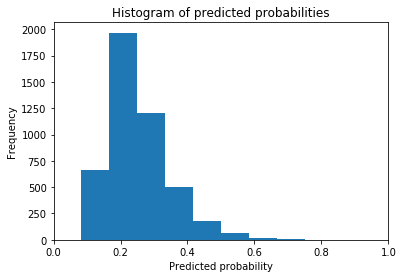


ROC curve for classifier: GrB


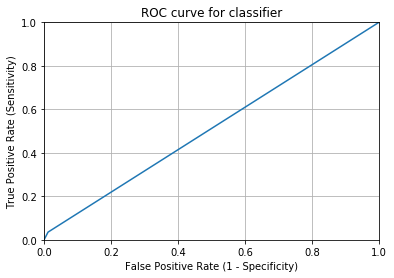

AUC for classifier: GrB  =  0.6185163639044514

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
NB: 0.676644 (0.013823) 

Prediction: NB
Accuracy Score: 0.6868598823273044

Confusion Matrix:
 [[2811  672]
 [ 765  341]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      3483
           1       0.34      0.31      0.32      1106

    accuracy                           0.69      4589
   macro avg       0.56      0.56      0.56      4589
weighted avg       0.68      0.69      0.68      4589



Prediction probabilities distribution: NB


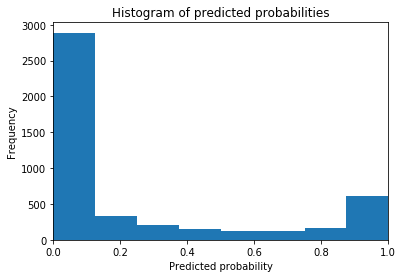


ROC curve for classifier: NB


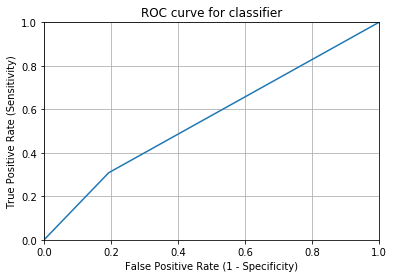

AUC for classifier: NB  =  0.596287885513673

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Estimate Model Accuracy: mean (std) 
SVM: 0.747911 (0.001391) 

Prediction: SVM
Accuracy Score: 0.7598605360645021

Confusion Matrix:
 [[3473   10]
 [1092   14]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      3483
           1       0.58      0.01      0.02      1106

    accuracy                           0.76      4589
   macro avg       0.67      0.50      0.44      4589
weighted avg       0.72      0.76      0.66      4589


An AttributeError has occurred. I can't show the histogram of predicted probabilities, ROC curve for classifier and AUC for the classifier.

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Estimate Model Accuracy: mean (std) 
Deep: 0.709334 (0.008516) 



C:\Users\aless\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Prediction: Deep
Accuracy Score: 0.71671388101983

Confusion Matrix:
 [[3075  408]
 [ 892  214]]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      3483
           1       0.34      0.19      0.25      1106

    accuracy                           0.72      4589
   macro avg       0.56      0.54      0.54      4589
weighted avg       0.67      0.72      0.69      4589



Prediction probabilities distribution: Deep


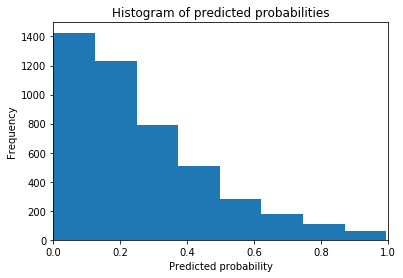


ROC curve for classifier: Deep


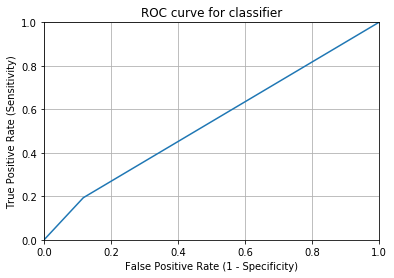

AUC for classifier: Deep  =  0.574323801632211

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [77]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFTree', RandomForestClassifier()))
models.append(('GrB', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Deep', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
print()

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('Estimate Model Accuracy: mean (std)','\n%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()),'\n')
    
    
    # Make predictions on validation dataset
    
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    # Evaluate predictions
    
    print("Prediction:", '%s' % (name))   
    print('Accuracy Score:',accuracy_score(Y_validation, predictions))
    print()
    print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions))
    print('\n')
    print('Classification Report:\n',classification_report(Y_validation, predictions))
    print()
    
    
    try:
        # store the predicted probabilities for class 1
        Y_pred_prob = model.predict_proba(X_validation)[:, 1]
    
    except AttributeError:
        print("An AttributeError has occurred. I can't show the histogram of predicted probabilities, ROC curve for classifier and AUC for the classifier.")
    
    else:
        
        # histogram of predicted probabilities
        
        print()
        print("Prediction probabilities distribution:", '%s' % (name)) 
        plt.hist(Y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability')
        plt.ylabel('Frequency')
        plt.show()
        
        # ROC curve for classifier
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        print()
        print("ROC curve for classifier:", '%s' % (name)) 
        fpr, tpr, thresholds = metrics.roc_curve(Y_validation, predictions)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.show()

        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        print("AUC for classifier:", '%s' % (name),' = ', metrics.roc_auc_score(Y_validation, Y_pred_prob))
        
        
    print()
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX','\n') 

Plot of **the spread and the mean accuracy** of each model. 

There is a **population of accuracy** measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

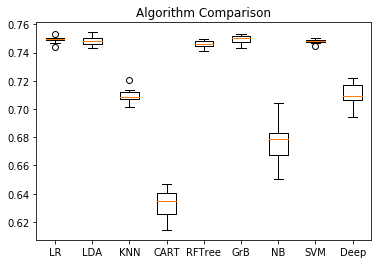

In [78]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

##### For Robust Scaled Data the chosen model is Deep Learning (Deep).

## 6.3 Choose the best model

The **Deep Learning (Deep)** model with **Robust Scaled Data** has been chosen, after the valuation of the number of False Positives , the Predictions Accuracy and the Precision.

<a id='Train_the_Final_Machine_Learning_Model'><a/>

[**Table of Content**](#Table_of_Content)

# 7. Train the Final Machine Learning Model

In [42]:
# Finalize a model by applying the chosen machine learning procedure on all data

X_final_training = donor_dataset_scaled_robust.drop('TARGET_B',axis=1)
y_final_training = donor_dataset_scaled_robust['TARGET_B']

model = MLPClassifier(max_iter=500)

print('start training')
start = time.time()

model.fit(X_final_training,y_final_training)

print('training_finished')
end = time.time()
print('time: ', end - start)

start training
training_finished
time:  77.68586158752441


<a id='Save_the_Final_Machine_Learning_Model'><a/>

[**Table of Content**](#Table_of_Content)

# 8. Save the Final Machine Learning Model

In [ ]:
# import joblib

In [43]:
# save the model to disk
filename_joblib = 'Deep_finalized_model_saved_with_Joblib.sav'
joblib.dump(model, filename_joblib, compress=0)  # 0 or False is no compression. Higher value means more compression, 
                                          # but also slower read and write times. Using a value of 3 is often a good 
                                          # compromise. If compress is True, the compression level used is 3.

['Deep_finalized_model_saved_with_Joblib.sav']

<a id='Data_Preparation_New_Data'><a/>

[**Table of Content**](#Table_of_Content)

# 9. Data Preparation of New Data

##### Dropped Columns: 

- HOME_OWNER
- INCOME_GROUP
- OVERLAY_SOURCE
- WEALTH_RATING

In [42]:
# A new prospective_dataset with dropped: HOME_OWNER' , 'INCOME_GROUP', OVERLAY_SOURCE
#                                    , 'WEALTH_RATING'

column_list_prospective = ['CONTROL_NUMBER','MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'DONOR_GENDER', 'PUBLISHED_PHONE',
       'MOR_HIT_RATE', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT']
prospective_dataset = prospective_data[column_list_prospective]

In [43]:
print(prospective_dataset.shape)

(2148, 44)


In [44]:
prospective_dataset.tail()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,C,1,24,F,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,01,M,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,?,.,F,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,?,.,F,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,C,1,24,F,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


### [ DONOR_AGE ]
**Handle missing values**

Text(0.5, 0, 'DONOR_AGE')

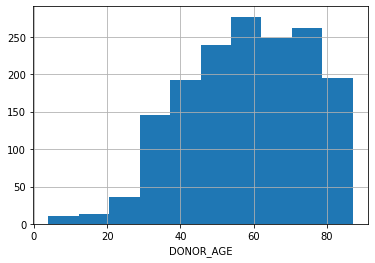

In [45]:
prospective_dataset['DONOR_AGE'].hist()
plt.xlabel('DONOR_AGE')

In [46]:
# deal with age missing values

# calculate the mean and the median for the whole population

median_DONOR_AGE_prospective = prospective_dataset['DONOR_AGE'].median()
print('Median = ',median_DONOR_AGE_prospective)
mean_DONOR_AGE_prospective = prospective_dataset['DONOR_AGE'].mean()
print('Mean = ',mean_DONOR_AGE_prospective)

Median =  59.0
Mean =  58.18591723285979


Because the **distribution is not normal**, NaN values will be replaced with the **median**.

In [47]:
prospective_dataset['DONOR_AGE'].fillna(median_DONOR_AGE_prospective, inplace = True)

Text(0.5, 0, 'DONOR_AGE')

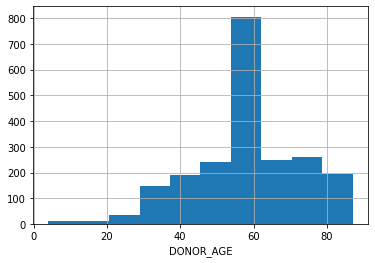

In [48]:
prospective_dataset['DONOR_AGE'].hist()
plt.xlabel('DONOR_AGE')

### [ MONTHS_SINCE_LAST_PROM_RESP ]

**Handle missing values**

Text(0.5, 0, 'MONTHS_SINCE_LAST_PROM_RESP')

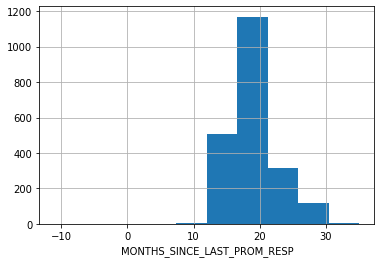

In [49]:
prospective_dataset['MONTHS_SINCE_LAST_PROM_RESP'].hist()
plt.xlabel('MONTHS_SINCE_LAST_PROM_RESP')

In [50]:
median_MONTHS_SINCE_LAST_PROM_RESP_prospective = prospective_dataset['MONTHS_SINCE_LAST_PROM_RESP'].median()
print('Median = ',median_MONTHS_SINCE_LAST_PROM_RESP_prospective)
mean_MONTHS_SINCE_LAST_PROM_RESP_prospective = prospective_dataset['MONTHS_SINCE_LAST_PROM_RESP'].mean()
print('Mean = ',mean_MONTHS_SINCE_LAST_PROM_RESP_prospective)

Median =  18.0
Mean =  19.07775683317625


Because the distribution is quite **normal**, NaN values will be replaced with the **mean**.

In [51]:
# replace NaN with the mean

prospective_dataset['MONTHS_SINCE_LAST_PROM_RESP'].fillna(mean_MONTHS_SINCE_LAST_PROM_RESP_prospective, inplace = True)

Text(0.5, 0, 'MONTHS_SINCE_LAST_PROM_RESP')

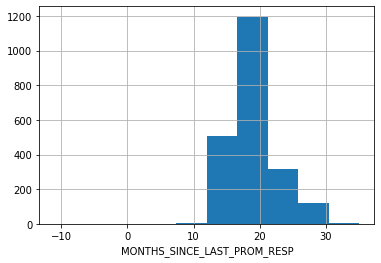

In [52]:
prospective_dataset['MONTHS_SINCE_LAST_PROM_RESP'].hist()
plt.xlabel('MONTHS_SINCE_LAST_PROM_RESP')

### [ SES ]
**Str values '1','2','3','4' replaced with numbers and '?' with number 5**.

In [53]:
prospective_dataset['SES'].unique()

array(['2', '1', '3', '?', '4'], dtype=object)

In [54]:
prospective_dataset['SES'].replace('1',1,inplace=True)
prospective_dataset['SES'].replace('2',2,inplace=True)
prospective_dataset['SES'].replace('3',3,inplace=True)
prospective_dataset['SES'].replace('4',4,inplace=True)
prospective_dataset['SES'].replace('?',5,inplace=True)

int64


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,C,1,24,F,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,01,M,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,5,.,F,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,5,.,F,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,C,1,24,F,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


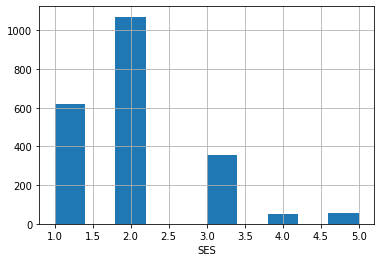

In [55]:
prospective_dataset['SES'].hist()
plt.xlabel('SES')
print(prospective_dataset['SES'].dtype)
prospective_dataset.tail()

### [ CLUSTER_CODE ]

**Replaced ' .' with the number '54' and after str values with numbers.**

In [56]:
prospective_dataset['CLUSTER_CODE'].unique()

array(['46', '43', '35', '02', '40', '37', '24', '11', '21', '16', '42',
       '27', '09', '12', '45', '26', '53', '25', '18', ' .', '29', '28',
       '14', '30', '39', '05', '20', '08', '17', '34', '07', '31', '13',
       '03', '36', '06', '04', '33', '49', '01', '50', '22', '23', '38',
       '41', '51', '10', '47', '32', '15', '44', '48', '19', '52'],
      dtype=object)

In [57]:
prospective_dataset['CLUSTER_CODE'].replace(' .','54',inplace=True)

In [58]:
prospective_dataset['CLUSTER_CODE'] = prospective_dataset['CLUSTER_CODE'].astype(int)

int32


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,C,1,24,F,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,1,M,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,5,54,F,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,5,54,F,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,C,1,24,F,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


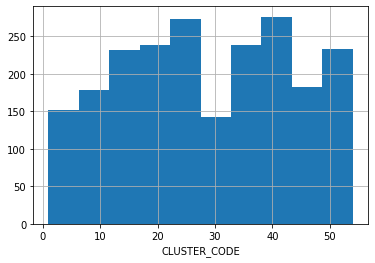

In [59]:
prospective_dataset['CLUSTER_CODE'].hist()
plt.xlabel('CLUSTER_CODE')
print(prospective_dataset['CLUSTER_CODE'].dtype)
prospective_dataset.tail()

### [ DONOR_GENDER ]

**Dropped rows with gender inputted wrongly.**

In [60]:
prospective_dataset['DONOR_GENDER'].unique()

array(['F', 'M', 'U'], dtype=object)

In [61]:
print(prospective_dataset.shape)
prospective_dataset.tail()

(2148, 44)


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,C,1,24,F,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,1,M,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,5,54,F,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,5,54,F,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,C,1,24,F,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


In [62]:
# Get names of indexes for which column ['DONOR_GENDER'] has value 'U'
indexNames = prospective_dataset[prospective_dataset['DONOR_GENDER'] == 'U'].index

# Delete these row indexes from dataFrame
prospective_dataset.drop(indexNames, inplace=True)

In [63]:
print(prospective_dataset.shape)
prospective_dataset.tail()

(2041, 44)


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,C,1,24,F,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,1,M,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,5,54,F,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,5,54,F,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,C,1,24,F,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


In [64]:
prospective_dataset.to_csv('prospective_prepared_for_analysis.csv',index=None)

**Replaced gender values with 1 for female, 0 for male with a categorical endoding.**

In [66]:
prospective_dataset['DONOR_GENDER'] = np.where(prospective_dataset['DONOR_GENDER']=='F',1,0) # categorical encoding

(2041, 44)


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,C,1,24,1,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,1,0,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,5,54,1,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,5,54,1,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,C,1,24,1,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


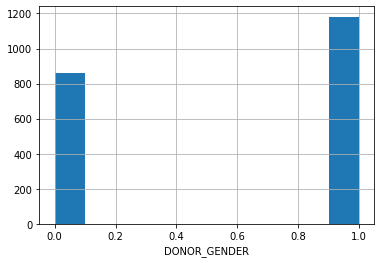

In [67]:
print(prospective_dataset.shape)
prospective_dataset['DONOR_GENDER'].hist()
plt.xlabel('DONOR_GENDER')
prospective_dataset.tail()

### [ URBANICITY ]

Replaced:
- ? -> 1
- R -> 2
- S -> 3
- U -> 4
- T -> 5
- C -> 6

In [68]:
prospective_dataset['URBANICITY'].replace('C',6,inplace=True)  # C = City
prospective_dataset['URBANICITY'].replace('T',5,inplace=True)  # T = Town
prospective_dataset['URBANICITY'].replace('U',4,inplace=True)  # U = Urban
prospective_dataset['URBANICITY'].replace('S',3,inplace=True)  # S = Suburban
prospective_dataset['URBANICITY'].replace('R',2,inplace=True)  # R = Rural
prospective_dataset['URBANICITY'].replace('?',1,inplace=True)  # ? = Unknown
prospective_dataset.tail()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,6,1,24,1,1,3,531,272,62,16674,0,22,48,41,1,0,A,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,4,1,1,0,1,16,5667,492,18,51280,1,28,16,56,0,0,A,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,1,5,54,1,1,0,634,281,87,12116,0,0,0,0,1,1,S,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,1,5,54,1,1,5,701,329,72,12284,0,36,52,28,0,0,A,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,6,1,24,1,1,240,778,388,67,18431,3,36,28,56,1,1,S,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


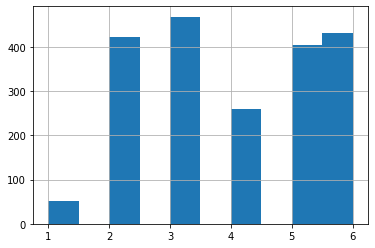

In [69]:
prospective_dataset['URBANICITY'].hist()
plt.show()

### RECENCY_STATUS_96NK

Replaced:
- A -> 1
- E -> 2
- F -> 3
- L -> 4
- N -> 5
- S -> 6

In [70]:
prospective_dataset['RECENCY_STATUS_96NK'].replace('A',1,inplace=True)
prospective_dataset['RECENCY_STATUS_96NK'].replace('E',2,inplace=True)
prospective_dataset['RECENCY_STATUS_96NK'].replace('F',3,inplace=True)
prospective_dataset['RECENCY_STATUS_96NK'].replace('L',4,inplace=True)
prospective_dataset['RECENCY_STATUS_96NK'].replace('N',5,inplace=True)
prospective_dataset['RECENCY_STATUS_96NK'].replace('S',6,inplace=True)
print(prospective_dataset.shape)
prospective_dataset.tail()

(2041, 44)


,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,190842,101,47.0,1,6,1,24,1,1,3,531,272,62,16674,0,22,48,41,1,0,1,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,4,1,1,0,1,16,5667,492,18,51280,1,28,16,56,0,0,1,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,1,5,54,1,1,0,634,281,87,12116,0,0,0,0,1,1,6,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,1,5,54,1,1,5,701,329,72,12284,0,36,52,28,0,0,1,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,191710,137,77.0,1,6,1,24,1,1,240,778,388,67,18431,3,36,28,56,1,1,6,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


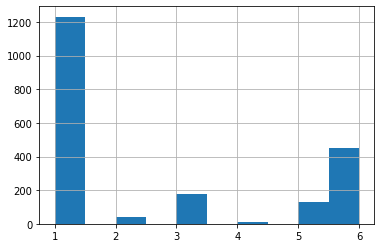

In [71]:
prospective_dataset['RECENCY_STATUS_96NK'].hist()
plt.show()

In [72]:
prospective_dataset.to_csv('Prospective Donor_ML with Python_PREPARED.csv', index=None)

### Prepare Data for Scaling

In [73]:
prospective_dataset

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,59.0,0,2,2,46,1,0,0,655,219,77,12671,0,46,24,53,0,0,1,1,0.071,21.00,0.000,0.00,1,0,26.0,11,25,103.0,7,14.71,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,59.0,0,2,2,43,1,1,0,475,227,70,10221,0,30,33,29,1,1,6,2,0.350,10.00,0.500,10.00,7,5,22.0,44,110,186.0,31,6.00,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,5,1,35,0,1,11,1117,544,87,18212,1,27,70,21,0,0,3,1,0.077,20.00,0.200,20.00,1,1,20.0,13,39,76.0,9,8.44,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,4,1,2,0,1,1,2257,485,84,17885,0,43,28,41,1,10,1,1,0.333,8.83,0.444,8.75,6,4,19.0,42,114,247.0,38,6.50,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,59.0,0,5,2,40,1,0,0,789,413,97,14123,0,31,16,7,0,0,1,3,0.278,5.40,0.222,6.00,5,2,20.0,15,43,70.0,12,5.83,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,6,1,24,1,1,3,531,272,62,16674,0,22,48,41,1,0,1,1,0.100,16.00,0.100,15.00,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,4,1,1,0,1,16,5667,492,18,51280,1,28,16,56,0,0,1,1,0.045,32.00,0.000,0.00,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,1,5,54,1,1,0,634,281,87,12116,0,0,0,0,1,1,6,3,0.263,11.20,0.364,11.50,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,1,5,54,1,1,5,701,329,72,12284,0,36,52,28,0,0,1,1,0.071,20.00,0.000,0.00,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


In [74]:
CONTROL_NUMBER = prospective_dataset['CONTROL_NUMBER']
print(CONTROL_NUMBER.shape, type(CONTROL_NUMBER))
CONTROL_NUMBER

(2041,) <class 'pandas.core.series.Series'>


0          139
1          142
2          282
3          368
4          387
         ...  
2143    190842
2144    191056
2145    191164
2146    191484
2147    191710
Name: CONTROL_NUMBER, Length: 2041, dtype: int64

In [75]:
CONTROL_NUMBER_np = CONTROL_NUMBER.to_numpy()
print(CONTROL_NUMBER_np.shape, type(CONTROL_NUMBER_np))
CONTROL_NUMBER_np

(2041,) <class 'numpy.ndarray'>


array([   139,    142,    282, ..., 191164, 191484, 191710], dtype=int64)

In [76]:
CONTROL_NUMBER_df = pd.DataFrame(CONTROL_NUMBER_np)
CONTROL_NUMBER_df.columns = ['CONTROL_NUMBER']
print(CONTROL_NUMBER_df.shape, type(CONTROL_NUMBER_df))
CONTROL_NUMBER_df

(2041, 1) <class 'pandas.core.frame.DataFrame'>


,CONTROL_NUMBER
0,139
1,142
2,282
3,368
4,387
...,...
2036,190842
2037,191056
2038,191164
2039,191484


In [77]:
prospective_dataset2 = prospective_dataset.drop('CONTROL_NUMBER',axis=1)

In [78]:
print(prospective_dataset2.shape)
prospective_dataset2.tail()

(2041, 43)


,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2143,101,47.0,1,6,1,24,1,1,3,531,272,62,16674,0,22,48,41,1,0,1,1,0.100,16.0,0.100,15.0,2,1,26.0,26,59,103.0,9,11.44,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,41,17.0,1,4,1,1,0,1,16,5667,492,18,51280,1,28,16,56,0,0,1,1,0.045,32.0,0.000,0.0,1,0,26.0,16,65,173.0,6,28.83,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,89,55.0,0,1,5,54,1,1,0,634,281,87,12116,0,0,0,0,1,1,6,3,0.263,11.2,0.364,11.5,5,4,18.0,25,62,143.0,17,8.41,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,65,42.0,1,1,5,54,1,1,5,701,329,72,12284,0,36,52,28,0,0,1,1,0.071,20.0,0.000,0.0,1,0,18.0,16,39,55.0,3,18.33,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1
2147,137,77.0,1,6,1,24,1,1,240,778,388,67,18431,3,36,28,56,1,1,6,3,0.200,9.0,0.200,10.0,4,2,21.0,32,76,164.0,21,7.81,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13


In [79]:
print(prospective_dataset2.columns)

Index(['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES',
       'CLUSTER_CODE', 'DONOR_GENDER', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2',
       'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT'],
      d

- **CONTROL_NUMBER_df**
- **prospective_dataset2**

##  Scaling

##### Robust Scaler

In [80]:
# create RobustScaler() object
scaler_robust = preprocessing.RobustScaler()

# transform data and store it in scaled_robust
scaled_robust = scaler_robust.fit_transform(prospective_dataset2)

# convert scaled_robust to DataFrame
scaled_robust_df = pd.DataFrame(scaled_robust, columns=['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES',
       'CLUSTER_CODE', 'DONOR_GENDER', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2',
       'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT'])

In [81]:
print(scaled_robust_df.shape)
scaled_robust_df.tail()

(2041, 43)


,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2036,0.428571,-0.666667,1.0,1.0,-1.0,-0.16,0.0,1.0,1.000000,-0.322785,-0.240000,-0.583333,0.421667,0.0,-0.692308,1.000000,0.409091,1.0,0.0,0.00,-0.5,-0.482014,0.222222,-0.429185,0.50,0.0,0.0,2.00,0.533333,0.324324,0.300000,0.181818,0.016012,0.6,0.142857,-0.571429,0.2,-1.0,-1.0,1.6,0.500000,0.016012,0.500000
2037,-0.285714,-2.333333,1.0,0.0,-1.0,-1.08,-1.0,1.0,5.333333,7.803797,1.017143,-2.416667,5.474376,1.0,-0.230769,-0.777778,1.090909,0.0,0.0,0.00,-0.5,-0.877698,2.000000,-0.858369,-1.00,-0.5,-1.0,2.00,-0.133333,0.486486,1.077778,-0.090909,2.547307,1.4,4.000000,2.142857,1.7,-1.0,3.0,1.6,-0.291667,2.547307,-0.333333
2038,0.285714,-0.222222,0.0,-1.5,3.0,1.04,0.0,1.0,0.000000,-0.159810,-0.188571,0.458333,-0.243831,0.0,-2.384615,-1.666667,-1.454545,1.0,1.0,1.25,0.5,0.690647,-0.311111,0.703863,0.15,1.5,3.0,0.00,0.466667,0.405405,0.744444,0.909091,-0.425036,-0.1,-0.571429,-0.285714,-0.5,0.0,0.5,0.0,0.222222,-0.425036,0.666667
2039,0.000000,-0.944444,1.0,-1.5,3.0,1.04,0.0,1.0,1.666667,-0.053797,0.085714,-0.166667,-0.219302,0.0,0.384615,1.222222,-0.181818,0.0,0.0,0.00,-0.5,-0.690647,0.666667,-0.858369,-1.00,-0.5,-1.0,0.00,-0.133333,-0.216216,-0.233333,-0.363636,1.018923,-0.5,0.571429,1.428571,0.5,0.0,0.5,0.0,-0.125000,1.018923,-0.500000
2040,0.857143,1.000000,1.0,1.0,-1.0,-0.16,0.0,1.0,80.000000,0.068038,0.422857,-0.375000,0.678201,3.0,0.384615,-0.111111,1.090909,1.0,1.0,1.25,0.5,0.237410,-0.555556,0.000000,0.00,1.0,1.0,0.75,0.933333,0.783784,0.977778,1.272727,-0.512373,-0.1,-0.857143,-0.571429,-0.5,0.0,0.5,0.6,0.902778,-0.512373,1.500000


In [82]:
prospective_dataset_scaled_robust = CONTROL_NUMBER_df.join(scaled_robust_df, how='right')

In [83]:
prospective_dataset_scaled_robust

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,0.428571,0.000000,0.0,-1.0,0.0,0.72,0.0,0.0,0.000000,-0.126582,-0.542857,0.041667,-0.162797,0.0,1.153846,-0.333333,0.954545,0.0,0.0,0.00,-0.5,-0.690647,0.777778,-0.858369,-1.000,-0.5,-1.0,2.00,-0.466667,-0.594595,0.300000,0.000000,0.491994,0.6,0.714286,0.000000,0.6,-2.0,-1.0,1.6,0.347222,0.491994,-0.333333
1,142,0.857143,0.000000,0.0,-1.0,0.0,0.60,0.0,1.0,0.000000,-0.411392,-0.497143,-0.250000,-0.520514,0.0,-0.076923,0.166667,-0.136364,1.0,1.0,1.25,0.0,1.316547,-0.444444,1.287554,0.000,2.5,4.0,1.00,1.733333,1.702703,1.222222,2.181818,-0.775837,-0.1,-0.714286,-0.428571,-0.5,3.0,5.0,0.8,0.888889,-0.775837,1.666667
2,282,-0.571429,-1.611111,0.0,0.5,-1.0,0.28,-1.0,1.0,3.666667,0.604430,1.314286,0.458333,0.646226,1.0,-0.307692,2.222222,-0.500000,0.0,0.0,0.50,-0.5,-0.647482,0.666667,0.000000,1.000,-0.5,0.0,0.50,-0.333333,-0.216216,0.000000,0.181818,-0.420670,0.5,0.571429,0.000000,0.5,-1.0,1.0,0.4,0.305556,-0.420670,-0.500000
3,368,0.857143,0.888889,0.0,0.0,-1.0,-1.04,-1.0,1.0,0.333333,2.408228,0.977143,0.333333,0.598482,0.0,0.923077,-0.111111,0.409091,1.0,10.0,0.00,-0.5,1.194245,-0.574444,1.047210,-0.125,2.0,3.0,0.25,1.600000,1.810811,1.900000,2.818182,-0.703057,-0.5,-0.857143,0.000000,-0.5,4.0,6.0,0.2,0.888889,-0.703057,3.000000
4,387,-0.714286,0.000000,0.0,0.5,0.0,0.48,0.0,0.0,0.000000,0.085443,0.565714,0.875000,0.049204,0.0,0.000000,-0.777778,-1.136364,0.0,0.0,0.00,0.5,0.798561,-0.955556,0.094421,-0.400,1.5,1.0,0.50,-0.200000,-0.108108,-0.066667,0.454545,-0.800582,-0.3,-0.857143,-0.285714,-1.0,-1.0,0.0,0.0,0.277778,-0.800582,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,190842,0.428571,-0.666667,1.0,1.0,-1.0,-0.16,0.0,1.0,1.000000,-0.322785,-0.240000,-0.583333,0.421667,0.0,-0.692308,1.000000,0.409091,1.0,0.0,0.00,-0.5,-0.482014,0.222222,-0.429185,0.500,0.0,0.0,2.00,0.533333,0.324324,0.300000,0.181818,0.016012,0.6,0.142857,-0.571429,0.2,-1.0,-1.0,1.6,0.500000,0.016012,0.500000
2037,191056,-0.285714,-2.333333,1.0,0.0,-1.0,-1.08,-1.0,1.0,5.333333,7.803797,1.017143,-2.416667,5.474376,1.0,-0.230769,-0.777778,1.090909,0.0,0.0,0.00,-0.5,-0.877698,2.000000,-0.858369,-1.000,-0.5,-1.0,2.00,-0.133333,0.486486,1.077778,-0.090909,2.547307,1.4,4.000000,2.142857,1.7,-1.0,3.0,1.6,-0.291667,2.547307,-0.333333
2038,191164,0.285714,-0.222222,0.0,-1.5,3.0,1.04,0.0,1.0,0.000000,-0.159810,-0.188571,0.458333,-0.243831,0.0,-2.384615,-1.666667,-1.454545,1.0,1.0,1.25,0.5,0.690647,-0.311111,0.703863,0.150,1.5,3.0,0.00,0.466667,0.405405,0.744444,0.909091,-0.425036,-0.1,-0.571429,-0.285714,-0.5,0.0,0.5,0.0,0.222222,-0.425036,0.666667
2039,191484,0.000000,-0.944444,1.0,-1.5,3.0,1.04,0.0,1.0,1.666667,-0.053797,0.085714,-0.166667,-0.219302,0.0,0.384615,1.222222,-0.181818,0.0,0.0,0.00,-0.5,-0.690647,0.666667,-0.858369,-1.000,-0.5,-1.0,0.00,-0.133333,-0.216216,-0.233333,-0.363636,1.018923,-0.5,0.571429,1.428571,0.5,0.0,0.5,0.0,-0.125000,1.018923,-0.500000


In [84]:
prospective_dataset_scaled_robust.to_csv('Prospective Donor_ML with Python_PREPARED_SCALED.csv', index=None)

<a id='Making_Predictions'><a/>

[**Table of Content**](#Table_of_Content)

# 10. Make Predictions

In [85]:
# A new prospective_dataset with dropped: 'CONTROL_NUMBER'

column_list_prospective_without_CONTROL_NUMBER = ['MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'DONOR_GENDER', 'PUBLISHED_PHONE',
       'MOR_HIT_RATE', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT']

In [86]:
# Loading the model
loaded_model_joblib = joblib.load('Deep_finalized_model_saved_with_Joblib.sav')

In [87]:
# Making predictions on New Data
Xnew = prospective_dataset_scaled_robust[column_list_prospective_without_CONTROL_NUMBER]
ynew = loaded_model_joblib.predict(Xnew)

In [88]:
print(len(ynew))
print(ynew)

2041
[0 0 1 ... 0 1 0]


In [89]:
print(type(Xnew),type(ynew))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [90]:
# Convert the outcome in DataFrame
ynew_df = pd.DataFrame(ynew)

In [91]:
len(ynew_df)

2041

In [92]:
ynew_df.isna().sum()

0    0
dtype: int64

In [93]:
print(type(Xnew),type(ynew_df))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [94]:
ynew_df.tail(100)

,0
1941,0
1942,1
1943,0
1944,0
1945,0
...,...
2036,0
2037,1
2038,0
2039,1


In [95]:
ynew_df.columns = ['Prediction']
ynew_df.tail()

,Prediction
2036,0
2037,1
2038,0
2039,1
2040,0


In [96]:
ynew_df.to_csv('Predictions.csv', index=None)

In [97]:
X_data = pd.read_csv('Prospective Donor_ML with Python_PREPARED_SCALED.csv')
Y_data = pd.read_csv('Predictions.csv')

In [98]:
X_data.tail()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
2036,190842,0.428571,-0.666667,1.0,1.0,-1.0,-0.16,0.0,1.0,1.000000,-0.322785,-0.240000,-0.583333,0.421667,0.0,-0.692308,1.000000,0.409091,1.0,0.0,0.00,-0.5,-0.482014,0.222222,-0.429185,0.50,0.0,0.0,2.00,0.533333,0.324324,0.300000,0.181818,0.016012,0.6,0.142857,-0.571429,0.2,-1.0,-1.0,1.6,0.500000,0.016012,0.500000
2037,191056,-0.285714,-2.333333,1.0,0.0,-1.0,-1.08,-1.0,1.0,5.333333,7.803797,1.017143,-2.416667,5.474376,1.0,-0.230769,-0.777778,1.090909,0.0,0.0,0.00,-0.5,-0.877698,2.000000,-0.858369,-1.00,-0.5,-1.0,2.00,-0.133333,0.486486,1.077778,-0.090909,2.547307,1.4,4.000000,2.142857,1.7,-1.0,3.0,1.6,-0.291667,2.547307,-0.333333
2038,191164,0.285714,-0.222222,0.0,-1.5,3.0,1.04,0.0,1.0,0.000000,-0.159810,-0.188571,0.458333,-0.243831,0.0,-2.384615,-1.666667,-1.454545,1.0,1.0,1.25,0.5,0.690647,-0.311111,0.703863,0.15,1.5,3.0,0.00,0.466667,0.405405,0.744444,0.909091,-0.425036,-0.1,-0.571429,-0.285714,-0.5,0.0,0.5,0.0,0.222222,-0.425036,0.666667
2039,191484,0.000000,-0.944444,1.0,-1.5,3.0,1.04,0.0,1.0,1.666667,-0.053797,0.085714,-0.166667,-0.219302,0.0,0.384615,1.222222,-0.181818,0.0,0.0,0.00,-0.5,-0.690647,0.666667,-0.858369,-1.00,-0.5,-1.0,0.00,-0.133333,-0.216216,-0.233333,-0.363636,1.018923,-0.5,0.571429,1.428571,0.5,0.0,0.5,0.0,-0.125000,1.018923,-0.500000
2040,191710,0.857143,1.000000,1.0,1.0,-1.0,-0.16,0.0,1.0,80.000000,0.068038,0.422857,-0.375000,0.678201,3.0,0.384615,-0.111111,1.090909,1.0,1.0,1.25,0.5,0.237410,-0.555556,0.000000,0.00,1.0,1.0,0.75,0.933333,0.783784,0.977778,1.272727,-0.512373,-0.1,-0.857143,-0.571429,-0.5,0.0,0.5,0.6,0.902778,-0.512373,1.500000


In [99]:
Y_data.tail()

,Prediction
2036,0
2037,1
2038,0
2039,1
2040,0


In [100]:
Z = X_data.join(Y_data, how='right')

In [101]:
Z

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,Prediction
0,139,0.428571,0.000000,0.0,-1.0,0.0,0.72,0.0,0.0,0.000000,-0.126582,-0.542857,0.041667,-0.162797,0.0,1.153846,-0.333333,0.954545,0.0,0.0,0.00,-0.5,-0.690647,0.777778,-0.858369,-1.000,-0.5,-1.0,2.00,-0.466667,-0.594595,0.300000,0.000000,0.491994,0.6,0.714286,0.000000,0.6,-2.0,-1.0,1.6,0.347222,0.491994,-0.333333,0
1,142,0.857143,0.000000,0.0,-1.0,0.0,0.60,0.0,1.0,0.000000,-0.411392,-0.497143,-0.250000,-0.520514,0.0,-0.076923,0.166667,-0.136364,1.0,1.0,1.25,0.0,1.316547,-0.444444,1.287554,0.000,2.5,4.0,1.00,1.733333,1.702703,1.222222,2.181818,-0.775837,-0.1,-0.714286,-0.428571,-0.5,3.0,5.0,0.8,0.888889,-0.775837,1.666667,0
2,282,-0.571429,-1.611111,0.0,0.5,-1.0,0.28,-1.0,1.0,3.666667,0.604430,1.314286,0.458333,0.646226,1.0,-0.307692,2.222222,-0.500000,0.0,0.0,0.50,-0.5,-0.647482,0.666667,0.000000,1.000,-0.5,0.0,0.50,-0.333333,-0.216216,0.000000,0.181818,-0.420670,0.5,0.571429,0.000000,0.5,-1.0,1.0,0.4,0.305556,-0.420670,-0.500000,1
3,368,0.857143,0.888889,0.0,0.0,-1.0,-1.04,-1.0,1.0,0.333333,2.408228,0.977143,0.333333,0.598482,0.0,0.923077,-0.111111,0.409091,1.0,10.0,0.00,-0.5,1.194245,-0.574444,1.047210,-0.125,2.0,3.0,0.25,1.600000,1.810811,1.900000,2.818182,-0.703057,-0.5,-0.857143,0.000000,-0.5,4.0,6.0,0.2,0.888889,-0.703057,3.000000,1
4,387,-0.714286,0.000000,0.0,0.5,0.0,0.48,0.0,0.0,0.000000,0.085443,0.565714,0.875000,0.049204,0.0,0.000000,-0.777778,-1.136364,0.0,0.0,0.00,0.5,0.798561,-0.955556,0.094421,-0.400,1.5,1.0,0.50,-0.200000,-0.108108,-0.066667,0.454545,-0.800582,-0.3,-0.857143,-0.285714,-1.0,-1.0,0.0,0.0,0.277778,-0.800582,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,190842,0.428571,-0.666667,1.0,1.0,-1.0,-0.16,0.0,1.0,1.000000,-0.322785,-0.240000,-0.583333,0.421667,0.0,-0.692308,1.000000,0.409091,1.0,0.0,0.00,-0.5,-0.482014,0.222222,-0.429185,0.500,0.0,0.0,2.00,0.533333,0.324324,0.300000,0.181818,0.016012,0.6,0.142857,-0.571429,0.2,-1.0,-1.0,1.6,0.500000,0.016012,0.500000,0
2037,191056,-0.285714,-2.333333,1.0,0.0,-1.0,-1.08,-1.0,1.0,5.333333,7.803797,1.017143,-2.416667,5.474376,1.0,-0.230769,-0.777778,1.090909,0.0,0.0,0.00,-0.5,-0.877698,2.000000,-0.858369,-1.000,-0.5,-1.0,2.00,-0.133333,0.486486,1.077778,-0.090909,2.547307,1.4,4.000000,2.142857,1.7,-1.0,3.0,1.6,-0.291667,2.547307,-0.333333,1
2038,191164,0.285714,-0.222222,0.0,-1.5,3.0,1.04,0.0,1.0,0.000000,-0.159810,-0.188571,0.458333,-0.243831,0.0,-2.384615,-1.666667,-1.454545,1.0,1.0,1.25,0.5,0.690647,-0.311111,0.703863,0.150,1.5,3.0,0.00,0.466667,0.405405,0.744444,0.909091,-0.425036,-0.1,-0.571429,-0.285714,-0.5,0.0,0.5,0.0,0.222222,-0.425036,0.666667,0
2039,191484,0.000000,-0.944444,1.0,-1.5,3.0,1.04,0.0,1.0,1.666667,-0.053797,0.085714,-0.166667,-0.219302,0.0,0.384615,1.222222,-0.181818,0.0,0.0,0.00,-0.5,-0.690647,0.666667,-0.858369,-1.000,-0.5,-1.0,0.00,-0.133333,-0.216216,-0.233333,-0.363636,1.018923,-0.5,0.571429,1.428571,0.5,0.0,0.5,0.0,-0.125000,1.018923,-0.500000,1


In [102]:
Z.to_csv('Prospective Donor_ML with Python_PREPARED_SCALED_with_Deep_PREDICTIONS.csv', index=None)

<a id='Present_Results'><a/>

[**Table of Content**](#Table_of_Content)